In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import uproot
# from getQuantilePlots import getDataForQuantPlot, getDataForPlot, getQuantile, getUprootBranch
import json
from json import JSONEncoder
import numpy

In [2]:
# from kdtree import dataSel
# dataMixFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+"mixed"+year+"_picoAOD_3bDvTMix4bDvT_4b_wJCM_v"+str(vn)+"_newSBDef.root" for year in ['2016', '2017', '2018']]
# arrayNames = ['weight',"passHLT","leadStM","sublStM","m4j", 'nSelJets']
# for dataFilename in dataMixFilename:
#     dataFile   = uproot.open(dataFilename)['Events']
#     data       = dataFile.arrays(arrayNames)
#     m4jPass = dataSelUproot(data,[m4jBinEdges[0][0], m4jBinEdges[-1][1]])
#     mcPsdoTagWSum = sum(np.array(data['weight'][m4jPass]))#,dtype=np.float32)
#     print(mcPsdoTagWSum)


In [3]:
m4jBinEdges = np.array([[0, 361], [361, 425], [425, 479], [479, 533], [533, 591], [591, 658], [658, 741], [741, 854], [854, 1044], [1044, 1800]])
yearArr = ['2016', '2017', '2018']
vn = 0
processArr = ['TTTo2L2Nu', 'TTToHadronic', 'TTToSemiLeptonic']
ttYearArr = [['2016_preVFP','2016_postVFP'],['2017'],['2018']]
# ttYearArr = ['2016_preVFP','2016_postVFP','2017','2018']

data3bFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+"data"+year+"_picoAOD_3b_wJCM_newSBDef.root" for year in yearArr]
dataMixFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+"mixed"+year+"_picoAOD_3bDvTMix4bDvT_4b_wJCM_v"+str(vn)+"_newSBDef.root" for year in yearArr]
# wDtoMFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/wDtoM/data"+year+"_picoAOD_3b_wJCM_newSBDef_wDtoM.root" for year in yearArr]
wDtoMFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/wDtoM/data"+year+"_picoAOD_3b_wJCM_newSBDef_wDtoM.root" for year in yearArr]
wDtoM4bFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/wDtoM/mixed"+year+"_picoAOD_3bDvTMix4bDvT_4b_wJCM_v0_newSBDef_wDtoM.root" for year in yearArr]
# w3to4Filename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/w3to4/data"+year+"_picoAOD_3b_wJCM_newSBDef_w3to4.root" for year in yearArr]
ttFilename = [["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+p+ttType+"_4b_noPSData_wTrigW_picoAOD_4b_wJCM_newSBDef.root" for ttType in ttYr for p in processArr] for ttYr in ttYearArr]
ttFilename3b = [["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+p+ttType+"_3b_wTrigW_picoAOD_3b_wJCM_newSBDef.root" for ttType in ttYr for p in processArr] for ttYr in ttYearArr]
# w3to4Filename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/w3to4/data"+year+"_picoAOD_3b_wJCM_newSBDef_w3to4.root" for year in yearArr]
w3to4Filename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/w3to4/data"+year+"_picoAOD_3b_wJCM_newSBDef_w3to4SR.root" for year in yearArr]


In [6]:
m4jBinEdges = np.array([[0, 361], [361, 425], [425, 479], [479, 533], [533, 591], [591, 658], [658, 741], [741, 854], [854, 1044], [1044, 1800]])
yearArr = ['2016', '2017', '2018']
vn = 0
mixEventCount = [115186.0, 111388.0, 161797.0]
processArr = ['TTTo2L2Nu', 'TTToHadronic', 'TTToSemiLeptonic']
ttYearArr = [['2016_preVFP','2016_postVFP'],['2017'],['2018']]
# ttYearArr = ['2016_preVFP','2016_postVFP','2017','2018']

data3bFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+"data"+year+"_picoAOD_3b_wJCM_newSBDef.root" for year in yearArr]
dataMixFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+"mixed"+year+"_picoAOD_3bDvTMix4bDvT_4b_wJCM_v"+str(vn)+"_newSBDef.root" for year in yearArr]
# wDtoMFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/wDtoM/data"+year+"_picoAOD_3b_wJCM_newSBDef_wDtoM.root" for year in yearArr]
wDtoMFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/wDtoMwJMC/data"+year+"_picoAOD_3b_wJCM_newSBDef_wDtoM.root" for year in yearArr]
wDtoM4bFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/wDtoMwJMC/mixed"+year+"_picoAOD_3bDvTMix4bDvT_4b_wJCM_v0_newSBDef_wDtoM.root" for year in yearArr]
# w3to4Filename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/w3to4/data"+year+"_picoAOD_3b_wJCM_newSBDef_w3to4.root" for year in yearArr]
ttFilename = [["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+p+ttType+"_4b_noPSData_wTrigW_picoAOD_4b_wJCM_newSBDef.root" for ttType in ttYr for p in processArr] for ttYr in ttYearArr]
ttFilename3b = [["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+p+ttType+"_3b_wTrigW_picoAOD_3b_wJCM_newSBDef.root" for ttType in ttYr for p in processArr] for ttYr in ttYearArr]
# w3to4Filename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/w3to4/data"+year+"_picoAOD_3b_wJCM_newSBDef_w3to4.root" for year in yearArr]
w3to4Filename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/w3to4wJCM/data"+year+"_picoAOD_3b_wJCM_newSBDef_w3to4.root" for year in yearArr]
w3to4LFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/w3to4wJCM/data"+year+"_picoAOD_3b_wJCM_newSBDef_w3to4SBL.root" for year in yearArr]
w3to4UFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/w3to4wJCM/data"+year+"_picoAOD_3b_wJCM_newSBDef_w3to4SBU.root" for year in yearArr]


In [7]:
# m4jBinEdges = np.array([[0, 361], [361, 425], [425, 479], [479, 533], [533, 591], [591, 658], [658, 741], [741, 854], [854, 1044], [1044, 1800]])
# yearArr = ['2016', '2017', '2018']
# vn = 0
# processArr = ['TTTo2L2Nu', 'TTToHadronic', 'TTToSemiLeptonic']
# ttYearArr = [['2016_preVFP','2016_postVFP'],['2017'],['2018']]
# # ttYearArr = ['2016_preVFP','2016_postVFP','2017','2018']
# mixEventCount = [115186.0, 111388.0, 161797.0]

# data3bFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+"data"+year+"_picoAOD_3b_wJCM_newSBDef.root" for year in yearArr]
# dataMixFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+"ZH4b"+year+"_picoAOD.root" for year in yearArr]
# wDtoMFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/wDtoMsansJCM/data"+year+"_picoAOD_3b_wJCM_newSBDef_wDtoM.root" for year in yearArr]
# wDtoM4bFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/wDtoMsansJCM/ZH4b"+year+"_picoAOD_wDtoM.root" for year in yearArr]
# w3to4Filename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/w3to4/data"+year+"_picoAOD_3b_wJCM_newSBDef_w3to4.root" for year in yearArr]
# ttFilename = [["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+p+ttType+"_4b_noPSData_wTrigW_picoAOD_4b_wJCM_newSBDef.root" for ttType in ttYr for p in processArr] for ttYr in ttYearArr]
# ttFilename3b = [["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+p+ttType+"_3b_wTrigW_picoAOD_3b_wJCM_newSBDef.root" for ttType in ttYr for p in processArr] for ttYr in ttYearArr]
# w3to4Filename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/w3to4wJCM/data"+year+"_picoAOD_3b_wJCM_newSBDef_ZH4b_w3to4.root" for year in yearArr]


In [3]:
data3bFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+"data"+year+"_picoAOD_3b_wJCM_newSBDef.root" for year in yearArr]
dataMixFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+"mixed"+year+"_picoAOD_3bDvTMix4bDvT_4b_wJCM_v"+str(vn)+"_newSBDef.root" for year in yearArr]
dataSigFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/ZH4b"+year+"_picoAOD.root" for year in yearArr]

wDtoMFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/wDtoMwJCM/data"+year+"_picoAOD_3b_wJCM_newSBDef_wDtoM.root" for year in yearArr]
w3to4Filename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/w3to4wJCM/data"+year+"_picoAOD_3b_wJCM_newSBDef_ZH4b_2percentGauss800-30_w3to4.root" for year in yearArr]

# wDtoMFilename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/wDtoM/data"+year+"_picoAOD_3b_wJCM_newSBDef_wDtoMwJCM.root" for year in yearArr]
# w3to4Filename = ["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/w3to4/data"+year+"_picoAOD_3b_wJCM_newSBDef_w3to4wJCM.root" for year in yearArr]


ttFilename = [["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+p+ttType+"_4b_noPSData_wTrigW_picoAOD_4b_wJCM_newSBDef.root" for ttType in ttYr for p in processArr] for ttYr in ttYearArr]
ttFilename3b = [["root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/"+p+ttType+"_3b_wTrigW_picoAOD_3b_wJCM_newSBDef.root" for ttType in ttYr for p in processArr] for ttYr in ttYearArr]


In [8]:
def dataSel(data, binEdge, dijetLim = None, binEdgeSec = None):
    sel = np.asarray(np.where(data['passHLT'], True, False))
    sel &= np.asarray(np.where((data['m4j']>binEdge[0]) & (data['m4j']<=binEdge[1]), True, False))
    # This is to combine lower and upper sidebands.
    if binEdgeSec is not None:
        sel |= np.asarray(np.where((data['m4j']>binEdgeSec[0]) & (data['m4j']<=binEdgeSec[1]), True, False))

    sel &= np.asarray(np.where((data['leadStM']>0), True,False))
    sel &= np.asarray(np.where((data['sublStM']>0), True,False))
    if dijetLim is not None:
        sel &= np.asarray(np.where((data['leadStM']<=dijetLim), True,False))
        sel &= np.asarray(np.where((data['sublStM']<=dijetLim), True,False))
    return sel

In [9]:
def dataSelUproot(data, binEdge, dijetLim = None, binEdgeSec = None):
    sel = data.passHLT==True
    if len(binEdge) == 2:
        sel = sel&((data.m4j>binEdge[0]) & (data.m4j<=binEdge[1]))
    else:
        sel = sel&(data.m4j>binEdge[0])
    # This is to combine lower and upper sidebands.
    if binEdgeSec is not None:
        sel = sel|((data.m4j>binEdgeSec[0]) & (data.m4j<=binEdgeSec[1]))

    sel = sel&(data.leadStM>0)
    sel = sel&(data.sublStM>0)
    if dijetLim is not None:
        sel = sel&(data.leadStM<=dijetLim)
        sel = sel&(data.sublStM<=dijetLim)
    return sel

def getSelDataW(filename, wDtoMFilename = None, w3to4Filename = None, binEdge=[0,1800], dijetLim=None, SR=None, gausArgs = None, sigIn=False):
    arrayNames = ['SR','weight',"leadStM","sublStM","m4j","passHLT","mcPseudoTagWeight", "mcPseudoTagWeightInclusive", 'nSelJets']
    content = (uproot.open(filename)['Events']).arrays(arrayNames)
    if sigIn==True:
        content['weight'] = np.load('gausWeight'+str(2016+gausArgs[-1])+'.npy')
    dataSel = dataSelUproot(content, binEdge, dijetLim = dijetLim)
    data = content[dataSel]; del content
#     if gausArgs is not None:
#         def gaus(x, mu, sigma):
#             return np.exp(-0.5*((x-mu)/sigma)**2)/(sigma*np.sqrt(2*np.pi))
#         mixEventCount = [115186.0, 111388.0, 161797.0]
#         gausScale = gaus(data['m4j'], mu=gausArgs[0], sigma=gausArgs[1])
#         sigFactor = gausArgs[2]*0.01*mixEventCount[gausArgs[-1]]
#         data['weight'] = sigFactor * gausScale/np.sum(np.array(gausScale), dtype=np.float32)
    if wDtoMFilename is not None: #### Only 3b-data files have wDtoM and w3to4 weights
        wDtoM = np.array(((uproot.open(wDtoMFilename)['Events']).arrays(['wDtoM']))['wDtoM'][dataSel])
        if w3to4Filename is not None:
            w3to4 = np.array(((uproot.open(w3to4Filename)['Events']).arrays(['w3to4']))['w3to4'][dataSel])
            ############# FIX THIS!!!!!!!!
            w3to4[np.where(np.isnan(w3to4)==True)] = 0
            w3to4[np.where(np.isinf(w3to4)==True)] = 0 #############
            return data, wDtoM, w3to4
        return data, wDtoM
    return data

In [15]:
def getBinByVar(var, m4jMax = 1800, dijetLim = 1000):
    if var == 'm4j':          
        bins = np.arange(0,m4jMax,25)
        bins = np.linspace(0,m4jMax,70)
    if var == 'nSelJets':
        bins = np.arange(0.5,15.5,1)
    if var == 'leadStM' or var == 'sublStM':
        bins = np.arange(0,dijetLim, 25)
        bins = np.linspace(0,dijetLim, 40)
    return bins

def getHistBincontent(data, wDtoM = None, w3to4 = None, var=['m4j'], wJCM = 'weight', inc = True, m4jBinEdges=m4jBinEdges):
    weights = data[wJCM]
    if wDtoM is not None:
        weights = weights*wDtoM
        if w3to4 is not None:
            weights = weights*w3to4
    varArr = [None] * len(var)
    for v in range(len(var)):
        bins = getBinByVar(var[v])
        bincount = [None] * len(m4jBinEdges)
        for SR in range(len(m4jBinEdges)):
            SRind = np.where(data['SR']==SR)[0]
            bincount[SR] = np.histogram(data[var[v]][SRind], bins=bins, weights = weights[SRind])[0]
        varArr[v] = bincount
        if inc:
            varArr[v] = np.sum(bincount, axis=0)
            varArr[v] = np.histogram(data[var[v]], bins=bins, weights = weights)[0]
#             print(np.sum(varArr))
    return varArr


In [16]:
# varArr = ['nSelJets', 'm4j', 'leadStM', 'sublStM'];
# # data4b = np.array([getHistBincontent(getSelDataW(f), var=varArr, inc=True) for f in dataMixFilename])
# for i in range(3):
#     print(np.sum(data4b[i]))

In [17]:
# def getFileDataSingle(var, filename, wFile = None):

varArr = ['nSelJets', 'm4j', 'leadStM', 'sublStM']
# wJCM = 'mcPseudoTagWeight'#Inclusive'
wJCM = 'weight'
inc = False
# data3bRaw = np.array([getHistBincontent(getSelDataW(f), var=varArr, wJCM='weight', inc=inc) for f in data3bFilename])
# ttbar3bRaw = np.array([np.sum([getHistBincontent(getSelDataW(t), var=varArr, wJCM='weight', inc=inc) for t in ttType], axis=0) for ttType in ttFilename3b])
data4b = np.array([getHistBincontent(getSelDataW(f), var=varArr, inc=inc) for f in dataMixFilename])
data3b = np.array([getHistBincontent(getSelDataW(f), var=varArr, wJCM=wJCM, inc=inc) for f in data3bFilename])
ttbar3b = np.array([np.sum([getHistBincontent(getSelDataW(t), var=varArr, wJCM=wJCM, inc=inc) for t in ttType], axis=0) for ttType in ttFilename3b])
ttbar4b = np.array([np.sum([getHistBincontent(getSelDataW(t), var=varArr, inc=inc) for t in ttType], axis=0) for ttType in ttFilename])


/tmp/ipykernel_27547/50340198.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data4b = np.array([getHistBincontent(getSelDataW(f), var=varArr, inc=inc) for f in dataMixFilename])
/tmp/ipykernel_27547/50340198.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data3b = np.array([getHistBincontent(getSelDataW(f), var=varArr, wJCM=wJCM, inc=inc) for f in data3bFilename])
/cvmfs/sft.cern.ch/lcg/views/LCG_102/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged n

In [6]:
data4bwDtoM = np.array([getHistBincontent(*getSelDataW(dataMixFilename[i], wDtoMFilename = wDtoM4bFilename[i]), var=varArr, wJCM=wJCM , inc=inc) for i in range(len(yearArr))])

/tmp/ipykernel_4981/643187837.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data4bwDtoM = np.array([getHistBincontent(*getSelDataW(dataMixFilename[i], wDtoMFilename = wDtoM4bFilename[i]), var=varArr, wJCM=wJCM , inc=inc) for i in range(len(yearArr))])


In [12]:
# data3bwDtoM = np.array([getHistBincontent(*getSelDataW(data3bFilename[i], wDtoMFilename = wDtoMFilename[i]), var=varArr, wJCM=wJCM , inc=inc) for i in range(len(yearArr))])
data4bwDtoM = np.array([getHistBincontent(*getSelDataW(dataMixFilename[i], wDtoMFilename = wDtoM4bFilename[i]), var=varArr, wJCM=wJCM , inc=inc) for i in range(len(yearArr))])
data3bwDtoM = np.array([getHistBincontent(*getSelDataW(data3bFilename[i], wDtoMFilename = wDtoMFilename[i]), var=varArr, wJCM=wJCM , inc=inc) for i in range(len(yearArr))])
data3bw3to4 = np.array([getHistBincontent(*getSelDataW(data3bFilename[i], wDtoMFilename = wDtoMFilename[i], w3to4Filename = w3to4Filename[i]), var=varArr, wJCM=wJCM, inc=inc) for i in range(len(yearArr))])
# sig = np.array([getHistBincontent(getSelDataW(dataSigFilename[f],gausArgs = [800,30,2,f]), var=varArr, inc=inc) for f in range(len(dataSigFilename))])



/tmp/ipykernel_4981/700530224.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data3bw3to4 = np.array([getHistBincontent(*getSelDataW(data3bFilename[i], wDtoMFilename = wDtoMFilename[i], w3to4Filename = w3to4Filename[i]), var=varArr, wJCM=wJCM, inc=inc) for i in range(len(yearArr))])


In [8]:
data3bw3to4L = np.array([getHistBincontent(*getSelDataW(data3bFilename[i], wDtoMFilename = wDtoMFilename[i], w3to4Filename = w3to4LFilename[i]), var=varArr, wJCM=wJCM, inc=inc) for i in range(len(yearArr))])
data3bw3to4U = np.array([getHistBincontent(*getSelDataW(data3bFilename[i], wDtoMFilename = wDtoMFilename[i], w3to4Filename = w3to4UFilename[i]), var=varArr, wJCM=wJCM, inc=inc) for i in range(len(yearArr))])


/tmp/ipykernel_4981/2488645394.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data3bw3to4L = np.array([getHistBincontent(*getSelDataW(data3bFilename[i], wDtoMFilename = wDtoMFilename[i], w3to4Filename = w3to4LFilename[i]), var=varArr, wJCM=wJCM, inc=inc) for i in range(len(yearArr))])
/tmp/ipykernel_4981/2488645394.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data3bw3to4U = np.array([getHistBincontent(*getSelDataW(data3bFilename[i], wDtoMFilename = wDtoMFilename[i], w3to4Filename = w3to4UFilename[i]), var=varArr, wJCM=wJCM, inc=inc) for i

In [17]:
# data3bw3to4 = np.array([getHistBincontent(*getSelDataW(data3bFilename[i], wDtoMFilename = wDtoMFilename[i], w3to4Filename = w3to4Filename[i]), var=varArr, wJCM=wJCM, inc=inc) for i in range(len(yearArr))])
data4b = np.array([getHistBincontent(getSelDataW(f), var=varArr, inc=True) for f in dataMixFilename])
print(np.sum(np.sum(data4b[:,0])))
data4b = np.array([getHistBincontent(getSelDataW(f), var=varArr, inc=False) for f in dataMixFilename])
print(np.sum((np.sum(np.sum(data4b[:,0], axis=1)))))

/tmp/ipykernel_11324/2958788786.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data4b = np.array([getHistBincontent(getSelDataW(f), var=varArr, inc=True) for f in dataMixFilename])


388371.0


/tmp/ipykernel_11324/2958788786.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data4b = np.array([getHistBincontent(getSelDataW(f), var=varArr, inc=False) for f in dataMixFilename])


388371.0

In [23]:
# data3bw3to4 = np.array([getHistBincontent(*getSelDataW(data3bFilename[i], wDtoMFilename = wDtoMFilename[i], w3to4Filename = w3to4Filename[i]), var=varArr, wJCM=wJCM, inc=inc) for i in range(len(yearArr))])
sig = np.array([getHistBincontent(getSelDataW(dataSigFilename[f],gausArgs = [800,30,2,f], sigIn=True), var=varArr, inc=True) for f in range(len(dataSigFilename))])
print(np.sum(np.sum(sig[:,1])))
sig = np.array([getHistBincontent(getSelDataW(dataSigFilename[f],gausArgs = [800,30,2,f], sigIn=True), var=varArr, inc=False) for f in range(len(dataSigFilename))])
print(np.sum((np.sum(np.sum(sig[:,1], axis=1)))))


/tmp/ipykernel_11324/2669507699.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sig = np.array([getHistBincontent(getSelDataW(dataSigFilename[f],gausArgs = [800,30,2,f], sigIn=True), var=varArr, inc=True) for f in range(len(dataSigFilename))])


7767.419758286091
7767.419758286094


/tmp/ipykernel_11324/2669507699.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sig = np.array([getHistBincontent(getSelDataW(dataSigFilename[f],gausArgs = [800,30,2,f], sigIn=True), var=varArr, inc=False) for f in range(len(dataSigFilename))])


In [18]:
def makePlot(data4b, qcd3b, ttbar4b = None, sigIn = None, title = '', var = None, m4jMax = 1800, dijetLim = 1000, m4jBinEdges = m4jBinEdges):
    plt.rcParams.update({'font.size': 22})
    figf, axs = plt.subplots(2, 1, sharex = True, figsize=(12.5,10), gridspec_kw={'height_ratios': [0.8,0.2]})
    plt.subplots_adjust(hspace=0.1)
    

    axs[0].set_ylabel("Events")
    axs[1].set_ylabel("Data/Bkgd.")
    bins = getBinByVar(var, m4jMax = m4jMax, dijetLim=dijetLim)
    bincenter = 0.5*(bins[:-1] + bins[1:])

    if ttbar4b is not None:
        bkgd = qcd3b+ttbar4b
        axs[0].hist([bins[:-1],bins[:-1]], bins=bins ,weights=[ttbar4b, qcd3b], label=['$\mathrm{t\overline{t}}$', 'Multijet Model'], color=['tab:blue', 'gold'], stacked=True, fill=True, alpha = 0.9, histtype='step', edgecolor='k')
        axs[1].set_ylim(bottom=0.1, top=1.8)
    else:
        bkgd = qcd3b
        axs[0].hist(bins[:-1], bins=bins ,weights=qcd3b, label= 'Data 3b', color='gold', stacked=True, fill=True, alpha = 0.9, histtype='step', edgecolor='k')
    
    axs[0].errorbar(bincenter, data4b, yerr=np.sqrt(data4b), marker='o', color='k', label='Mixed', ls='none')
    if sigIn is not None:
        axs[0].errorbar(bincenter, data4b+sigIn, yerr=np.sqrt(data4b), marker='o', color='r', label='Mixed+Signal', ls='none')
        axs[0].plot(bincenter, sigIn, color='r', label='Gaus(800,30)', ls='-')
    axs[0].errorbar(bincenter, bkgd , yerr = np.sqrt(bkgd), ls='none', color='k')
    axs[0].set_title('Events ' + title)
    axs[0].legend(); 
    
    axs[1].plot(bincenter, np.divide(data4b,bkgd, out=np.zeros(len(bkgd)), where=bkgd>0), 'o', color='k')
    if sigIn is not None:
        axs[1].plot(bincenter, np.divide(data4b+sigIn,bkgd, out=np.zeros(len(bkgd)), where=bkgd>0), 'o', color='r')
    axs[1].axhline(1,color='k',linestyle='-', alpha=0.3)
    plt.xlabel(var)

              
    for p in [0,1]:
        axs[p].minorticks_on()
        if var == 'm4j':
            axs[p].axvline(m4jBinEdges[1][0],color='k',linestyle='--')
            axs[p].axvline(m4jBinEdges[-2][1],color='k',linestyle='--')
            axs[p].axvline(m4jBinEdges[-1][1],color='k',linestyle='--', alpha=0.3)
            for i in range(len(m4jBinEdges)):
                axs[p].axvline(m4jBinEdges[i][0],color='k',linestyle='--', alpha=0.3)
            plt.xlabel(var+ " (GeV)")
            axs[0].set_ylim(bottom=0.0, top=440000)
            if ttbar4b is not None:
                axs[0].set_ylim(bottom=0.0, top=23100)
    if var == 'nSelJets':
        axs[0].set_ylim(bottom=0.0, top=4200000)
        if ttbar4b is not None:
            axs[0].set_ylim(bottom=0.0, top=155000)

    return figf, axs

In [16]:
prefix = ''
pp = PdfPages("summaryPlotsGaus800-30.pdf")
for v, var in enumerate(varArr):
    w3to4Plot,_ = makePlot(np.sum(data4b[:,v],axis=0), np.sum(data3bw3to4[:,v],axis=0), ttbar4b = np.sum(ttbar4b[:,v],axis=0), sigIn=np.sum(sig[:,v],axis=0), title = 'Gaussian(mu=800, sigma=30)',var=var)
#     plt.savefig(prefix+var+'_wJCMwDtoMw3to4.png')
    pp.savefig(w3to4Plot)
    plt.show(); plt.close()
pp.close()

NameError: name 'sig' is not defined

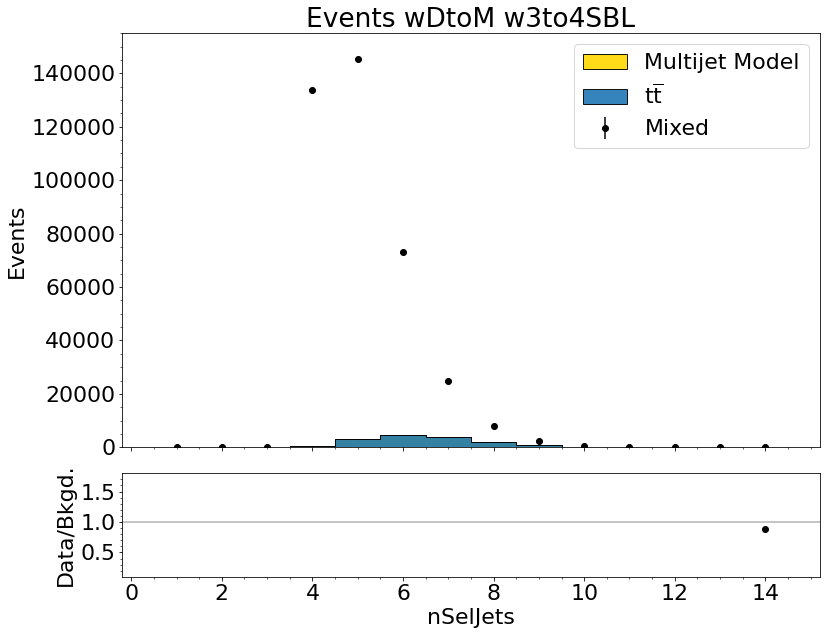

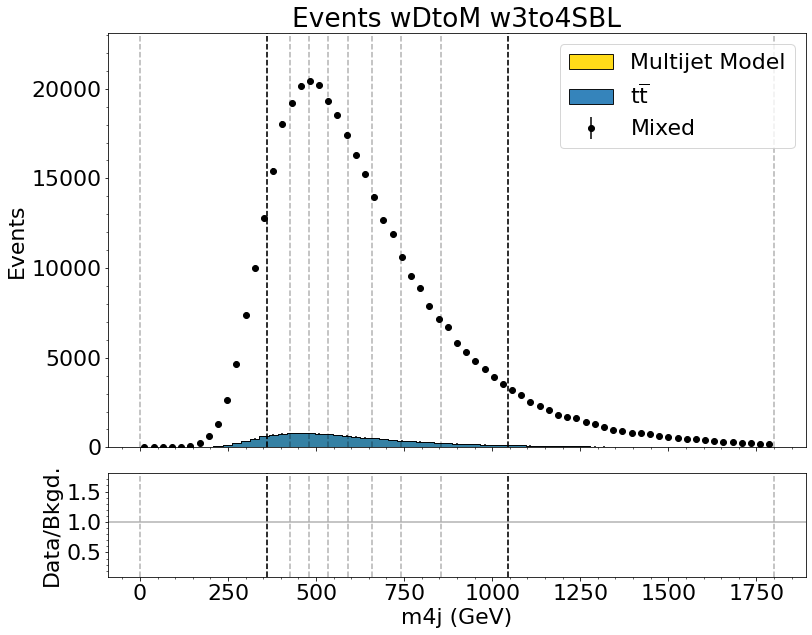

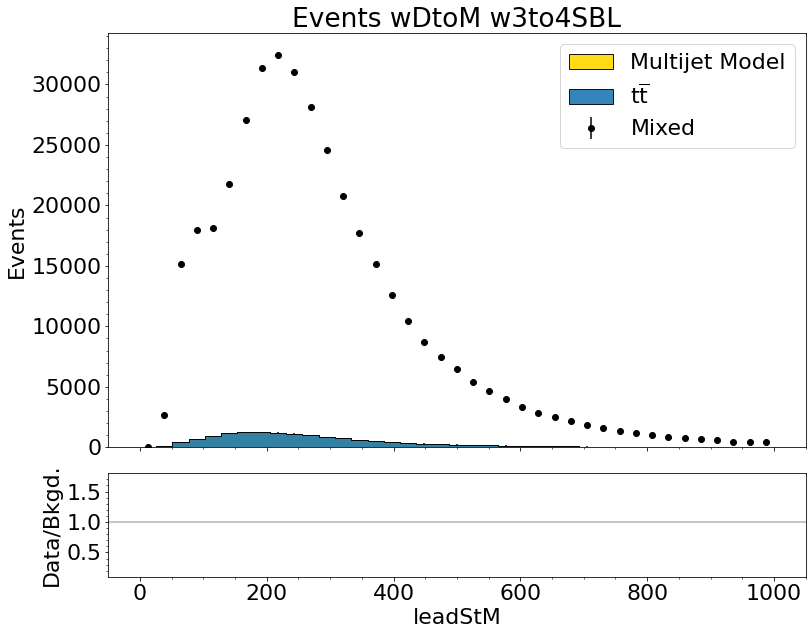

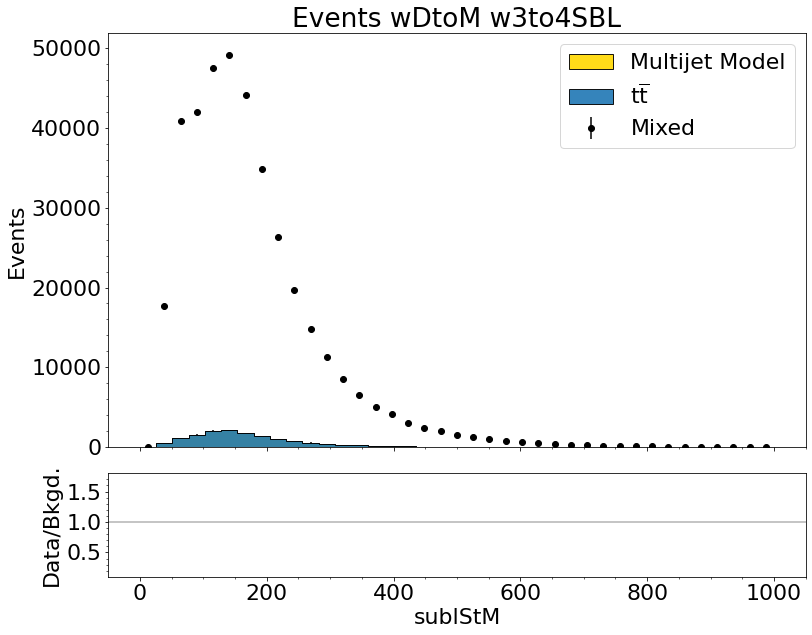

In [18]:
prefix = ''
pp = PdfPages("summaryPlotTestSBL.pdf")
for v, var in enumerate(varArr):
    w3to4Plot,_ = makePlot(np.sum(np.sum(data4b[:,v],axis=0),axis=0), np.sum(np.sum(data3bw3to4L[:,v],axis=0),axis=0), ttbar4b = np.sum(np.sum(ttbar4b[:,v],axis=0),axis=0), sigIn=None, title = 'wDtoM w3to4SBL',var=var)
#     plt.savefig(prefix+var+'_wJCMwDtoMw3to4.png')
    pp.savefig(w3to4Plot)
    plt.show(); plt.close()
pp.close()

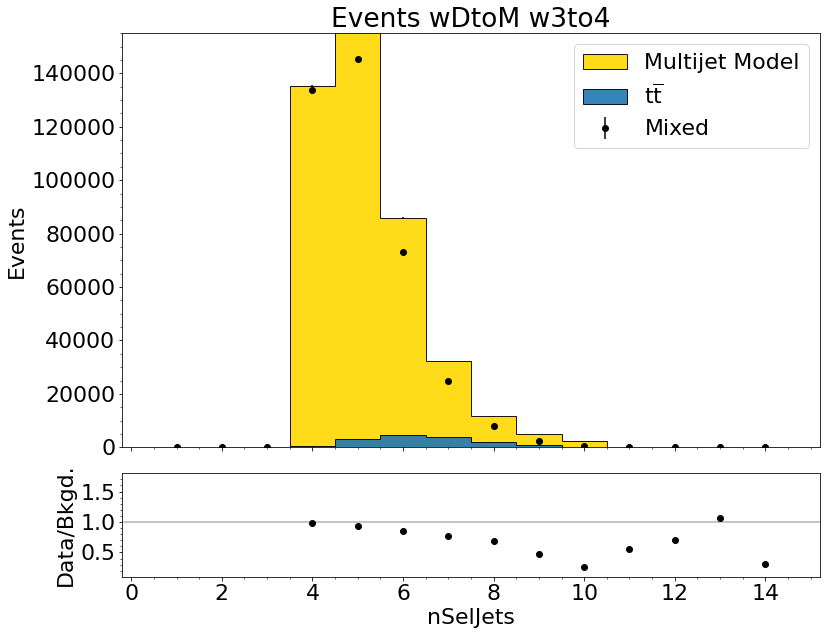

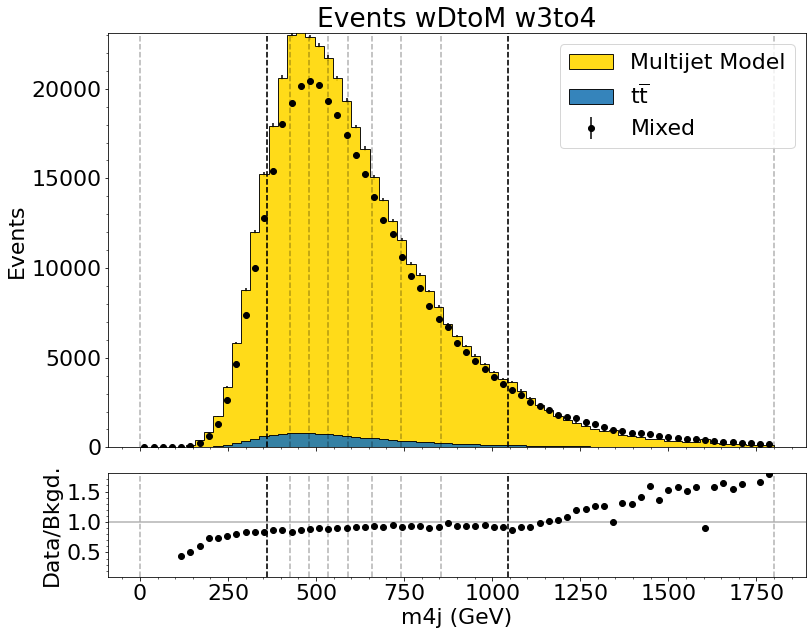

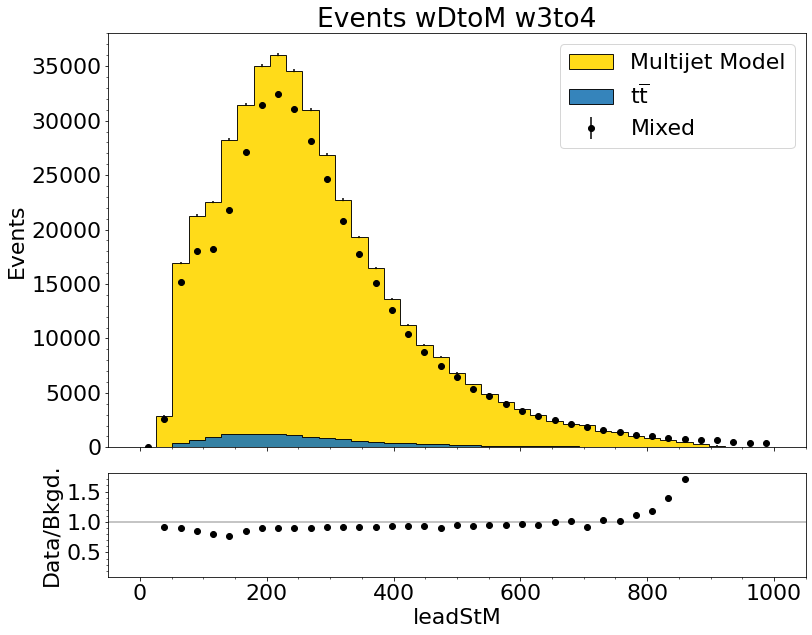

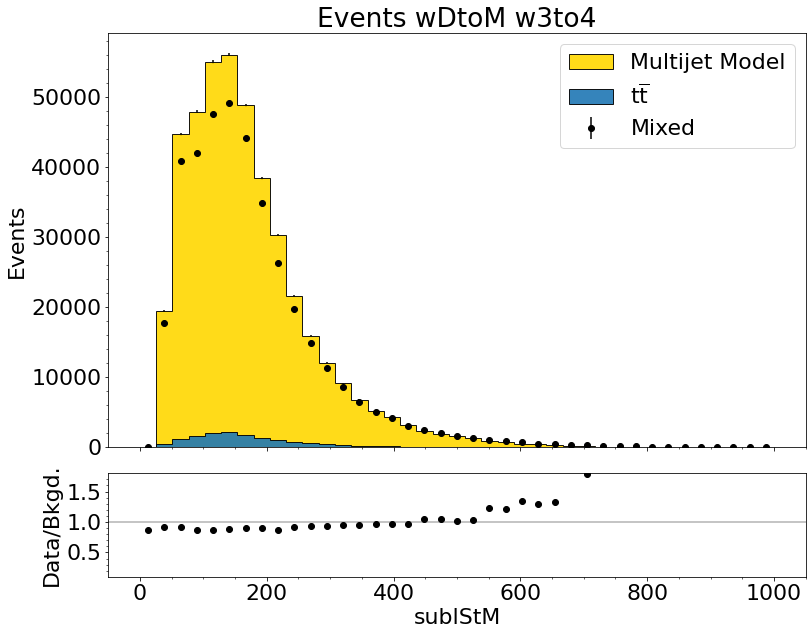

In [13]:
prefix = ''
pp = PdfPages("summaryPlotTestkNNBlah.pdf")
for v, var in enumerate(varArr):
    w3to4Plot,_ = makePlot(np.sum(np.sum(data4b[:,v],axis=0),axis=0), np.sum(np.sum(data3bw3to4[:,v],axis=0),axis=0), ttbar4b = np.sum(np.sum(ttbar4b[:,v],axis=0),axis=0), sigIn=None, title = 'wDtoM w3to4',var=var)
#     plt.savefig(prefix+var+'_wJCMwDtoMw3to4.png')
    pp.savefig(w3to4Plot)
    plt.show(); plt.close()
pp.close()

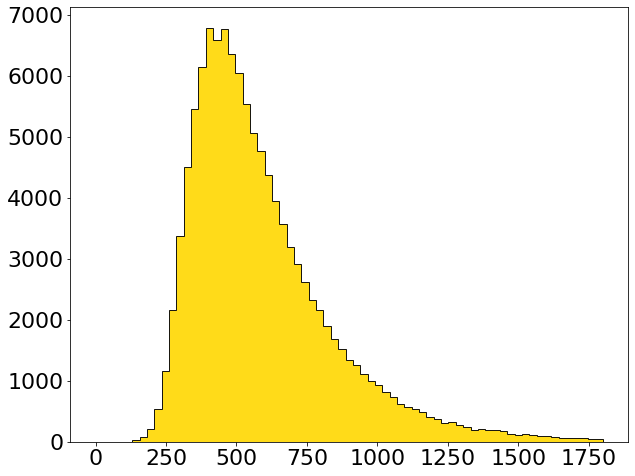

In [49]:
# np.sum(np.sum(data4b[:,1],axis=0),axis=0)
binb = getBinByVar('m4j')
plt.figure(figsize=(10,8))
plt.hist(binb[:-1], weights = np.sum(data4b[:,1],axis=1)[0], bins=binb, range=(0,1800),stacked=True,color='gold', fill=True, alpha = 0.9, histtype='step', edgecolor='k')
plt.hist(binb[:-1], weights = np.sum(sig[:,1],axis=1)[0], bins=binb, range=(0,1800),stacked=True,color='red', fill=True, alpha = 0.9, histtype='step', edgecolor='k')
# s = np.sum(sig[:,1],axis=1)[0]
plt.show()

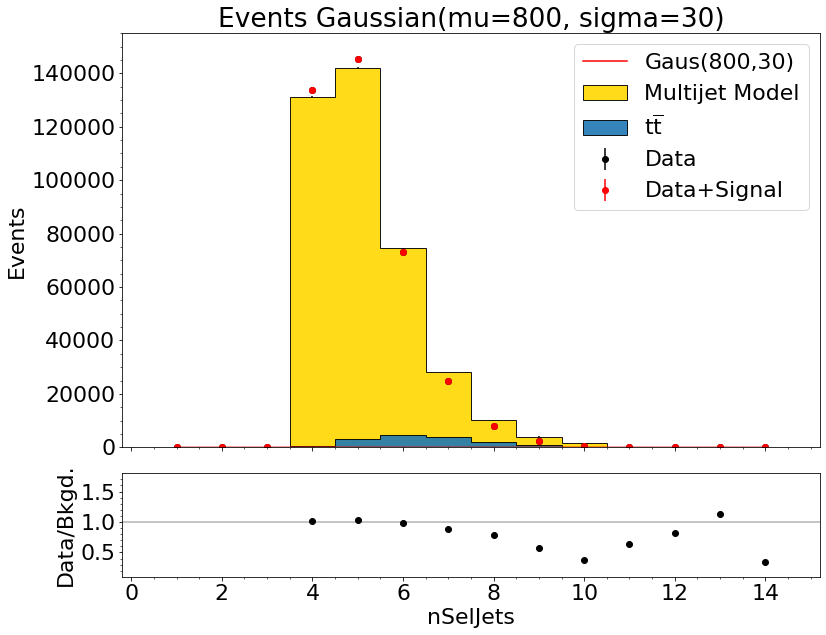

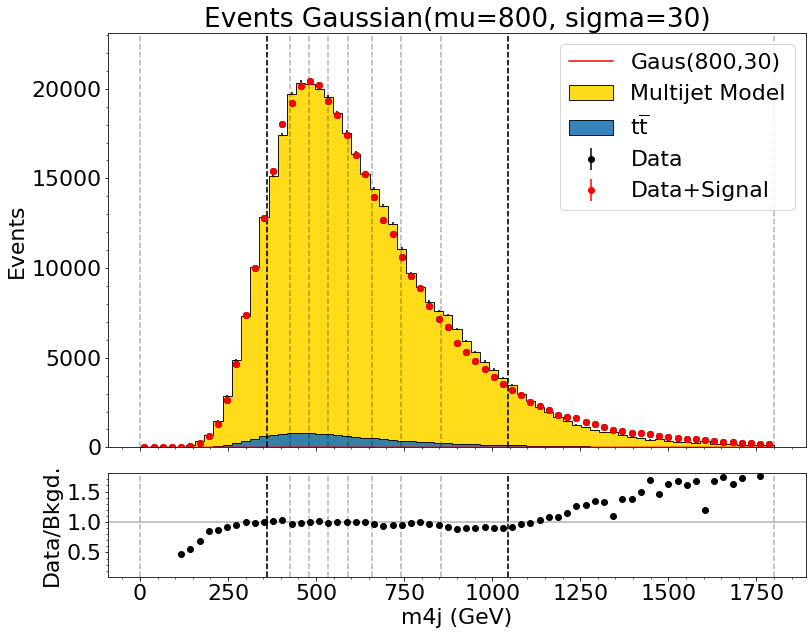

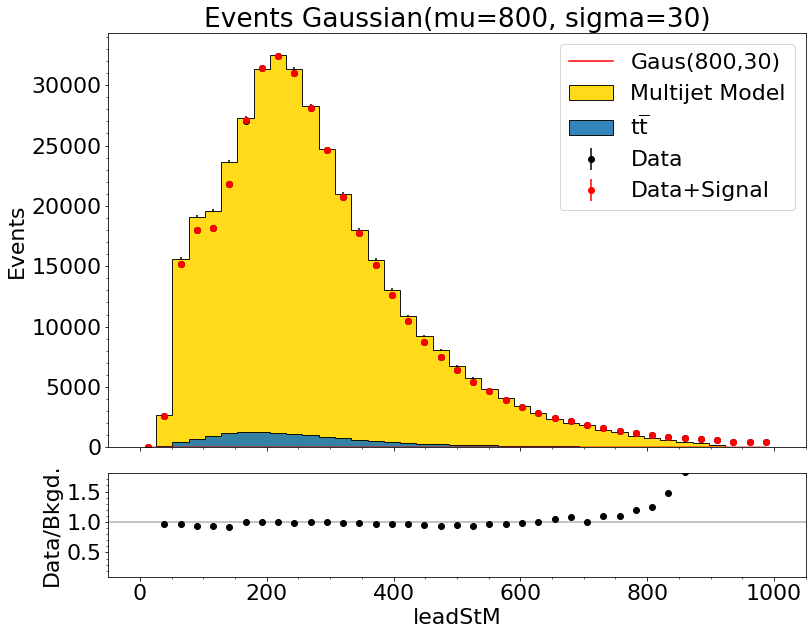

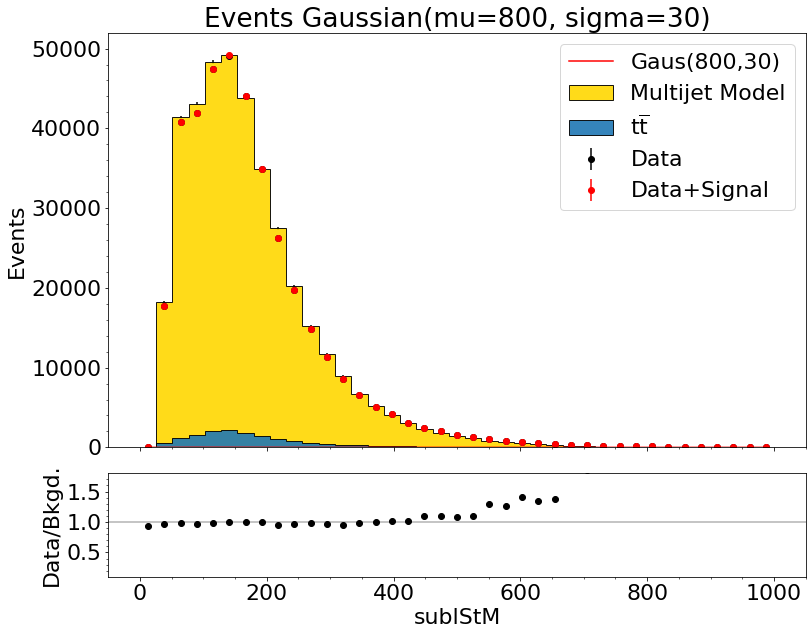

In [31]:
prefix = ''
pp = PdfPages("summaryPlotsGaus800-20.pdf")
for v, var in enumerate(varArr):
#     rawPlot,_ = makePlot(np.sum(np.sum(data4b[:,v],axis=0), axis=0), np.sum(np.sum(data3bRaw[:,v],axis=0),axis=0), var=var)
# #     plt.savefig(prefix+var+'_Unweighted.png')
#     pp.savefig(rawPlot)
#     plt.show(); plt.close()
# #     JCMPlot,_ = makePlot(np.sum(np.sum(data4b[:,v],axis=0), axis=0), np.sum(np.sum(data3b[:,v],axis=0),axis=0)-np.sum(np.sum(ttbar3b[:,v],axis=0),axis=0), ttbar4b = None, title = 'wDtoM with Jet Multiplicity Corrections', var=var)
#     JCMPlot,_ = makePlot(np.sum(np.sum(data4b[:,v],axis=0), axis=0), np.sum(np.sum(data3b[:,v],axis=0),axis=0)-np.sum(np.sum(ttbar3b[:,v],axis=0),axis=0), ttbar4b = np.sum(np.sum(ttbar4b[:,v],axis=0),axis=0), title = 'wJCM', var=var)
# #     plt.savefig(prefix+var+'_wJCM.png')
#     pp.savefig(JCMPlot)
#     plt.show(); plt.close()
#     wDtoMPlot,_ = makePlot(np.sum(np.sum(data4b[:,v],axis=0),axis=0), np.sum(np.sum(data3bwDtoM[:,v],axis=0),axis=0), ttbar4b = np.sum(np.sum(ttbar4b[:,v],axis=0),axis=0), title = 'wJCM wDtoM',var=var)
# #     plt.savefig(prefix+var+'_wJCMwDtoM.png')
#     pp.savefig(wDtoMPlot)
#     plt.show(); plt.close()
    w3to4Plot,_ = makePlot(np.sum(np.sum(data4b[:,v],axis=0),axis=0), np.sum(np.sum(data3bw3to4[:,v],axis=0),axis=0), ttbar4b = np.sum(np.sum(ttbar4b[:,v],axis=0),axis=0),sigIn=np.sum(np.sum(sig[:,v],axis=0),axis=0), title = 'Gaussian(mu=800, sigma=30)',var=var)
#     plt.savefig(prefix+var+'_wJCMwDtoMw3to4.png')
    pp.savefig(w3to4Plot)
    plt.show(); plt.close()
pp.close()

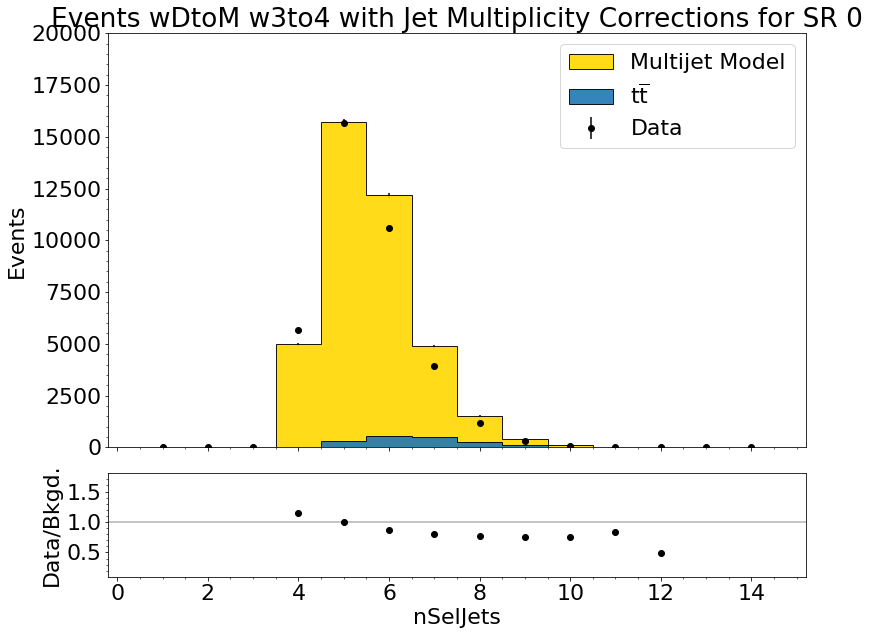

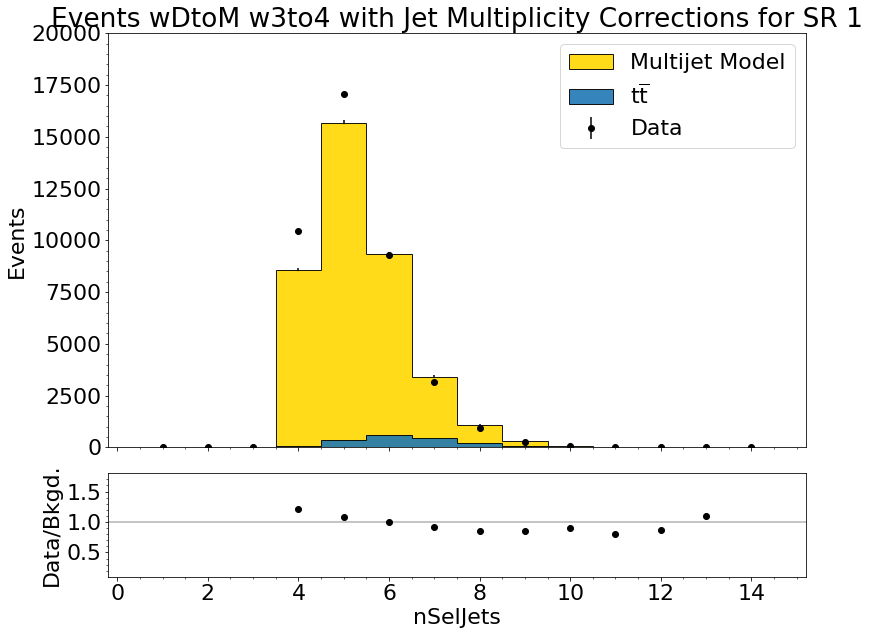

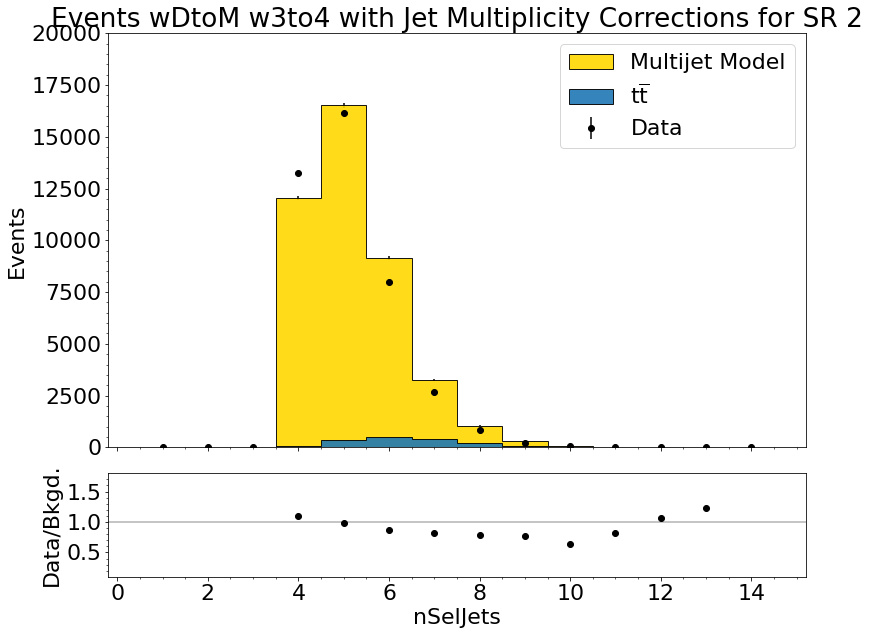

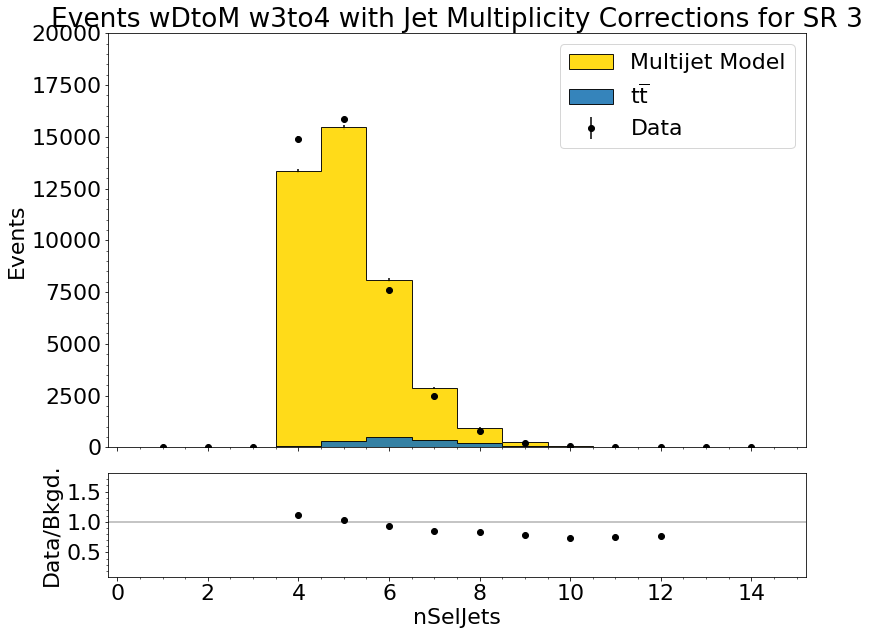

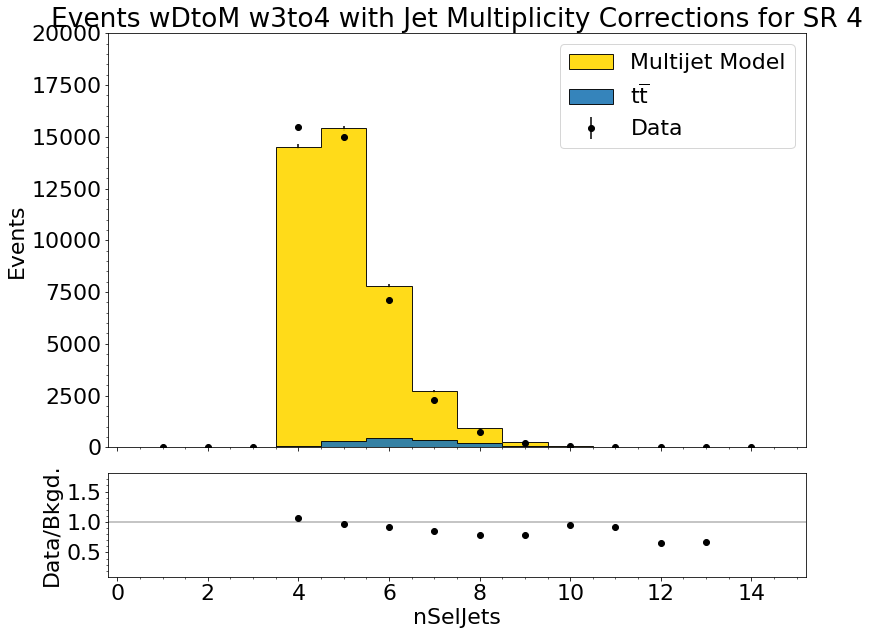

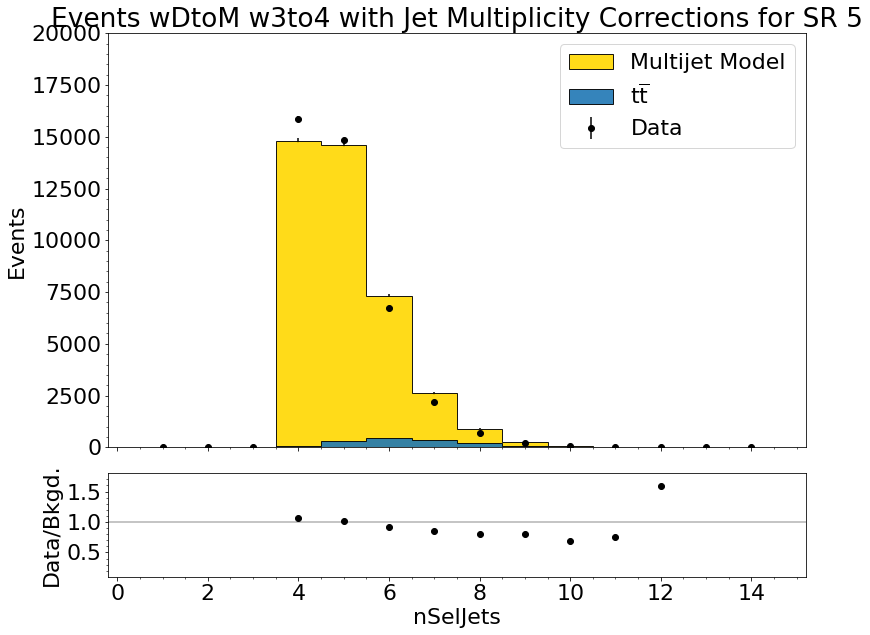

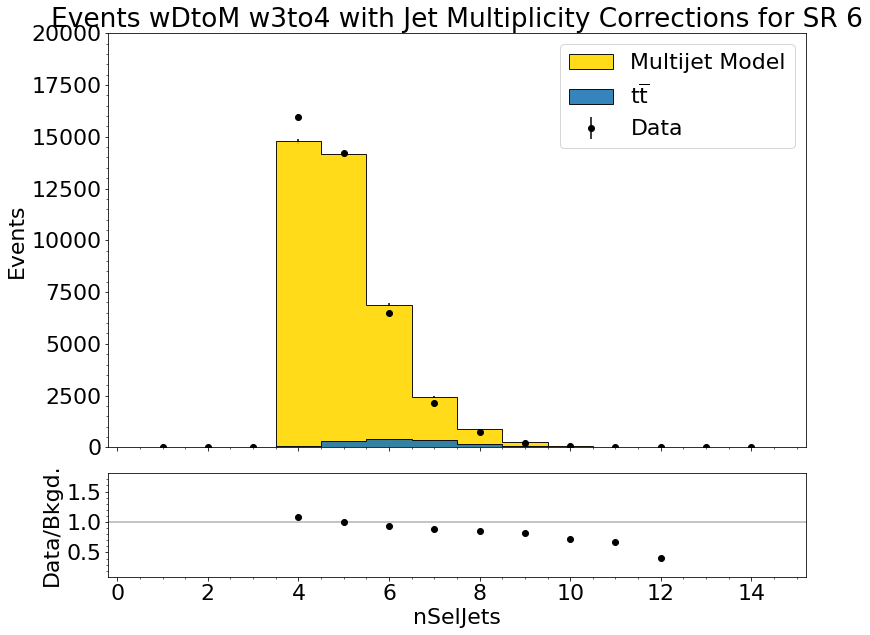

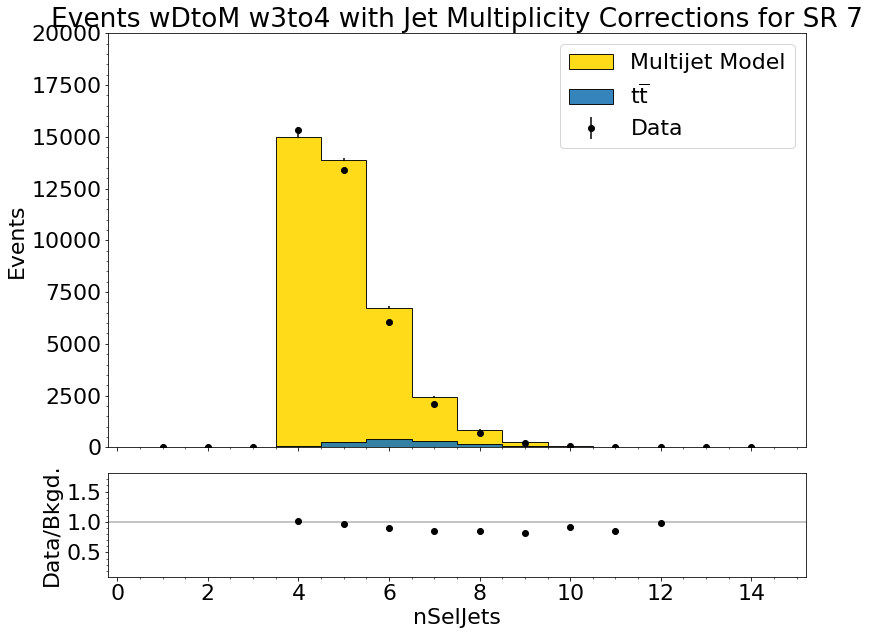

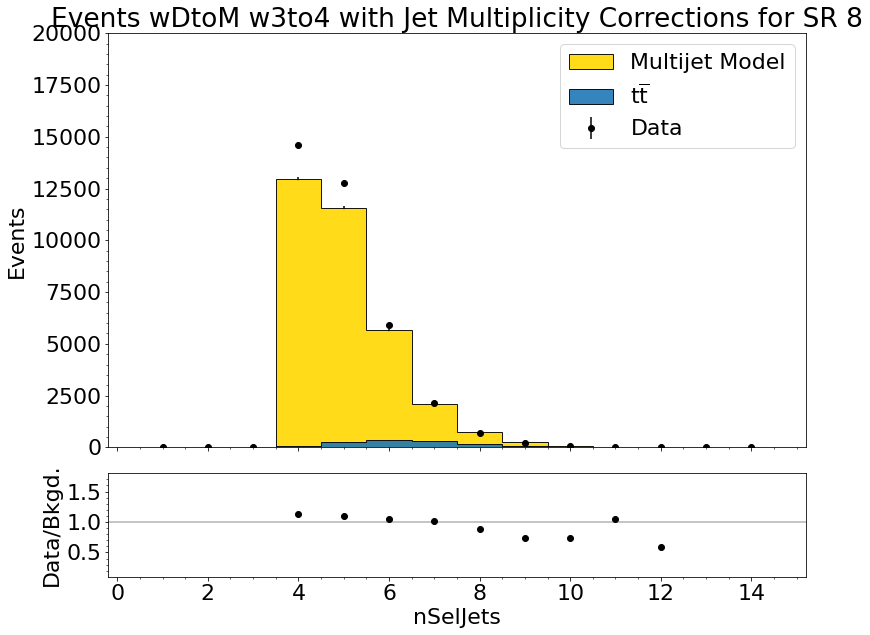

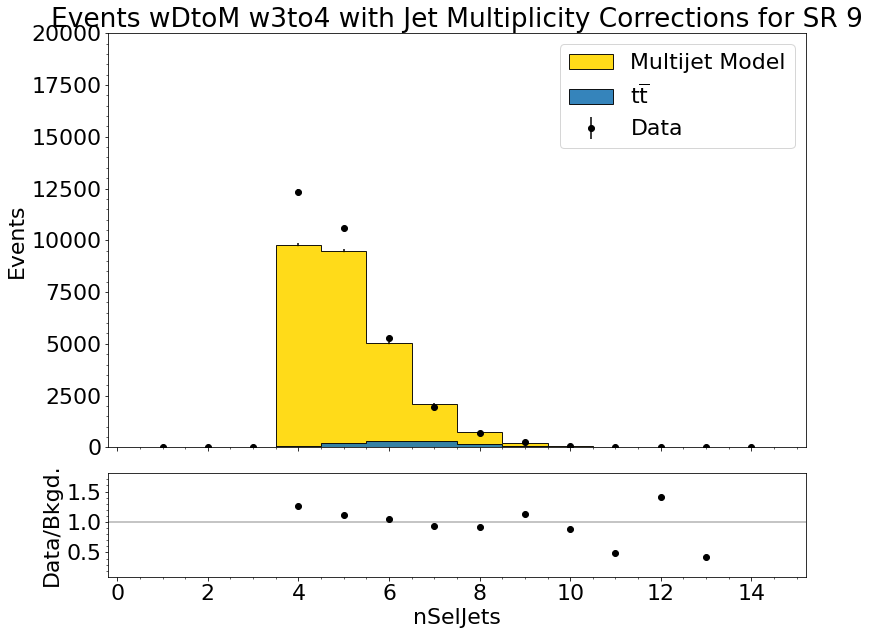

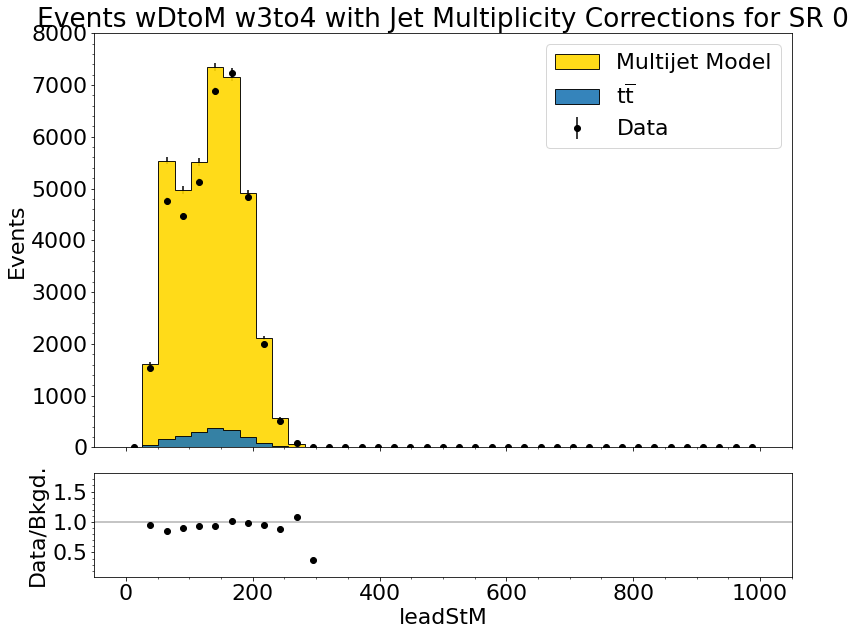

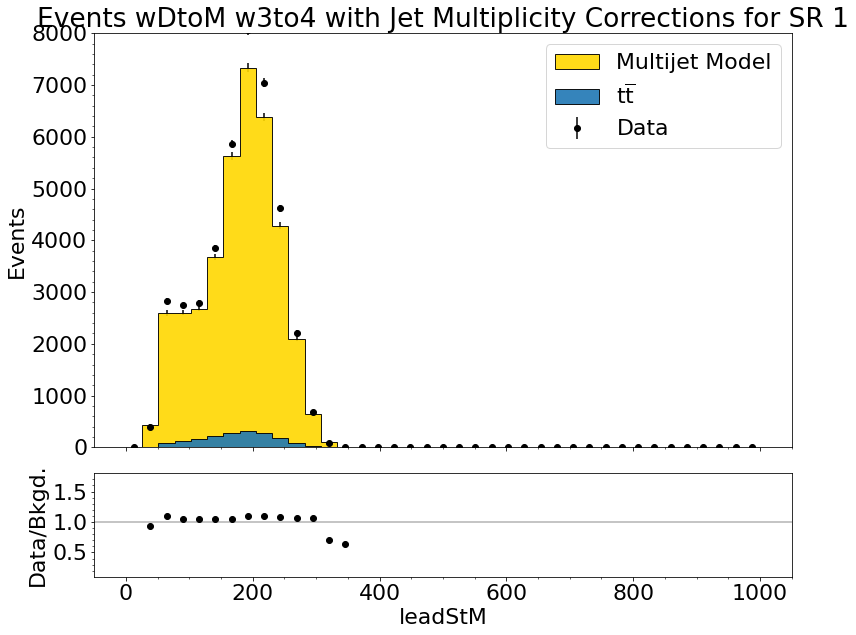

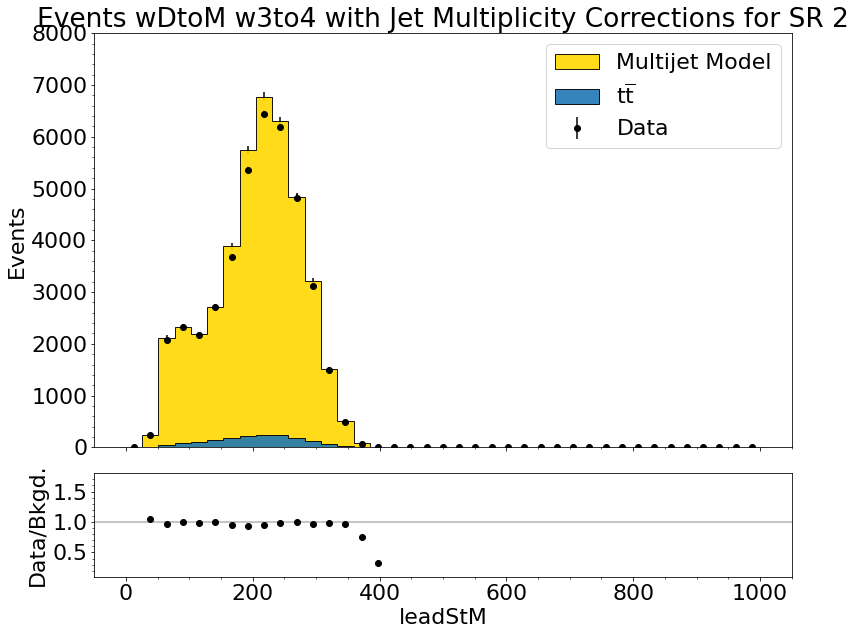

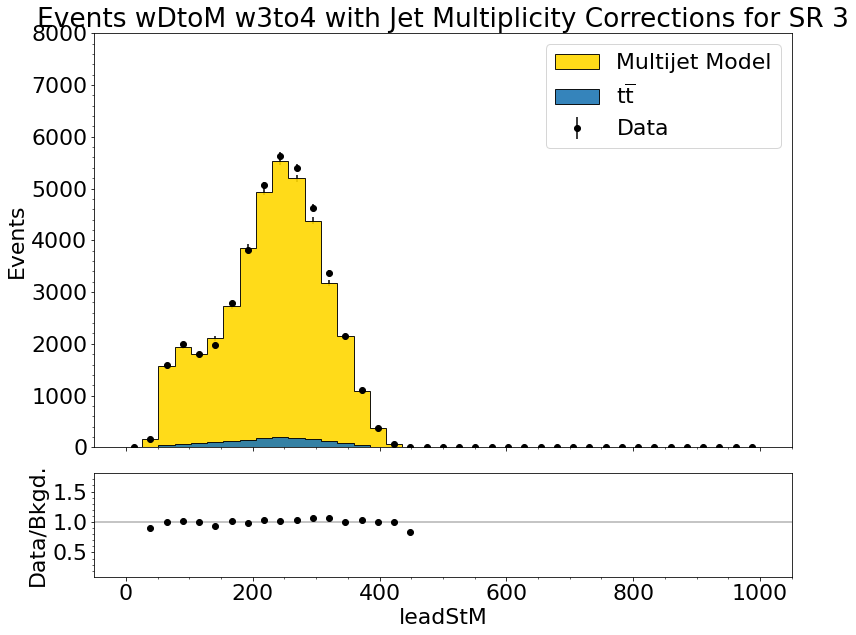

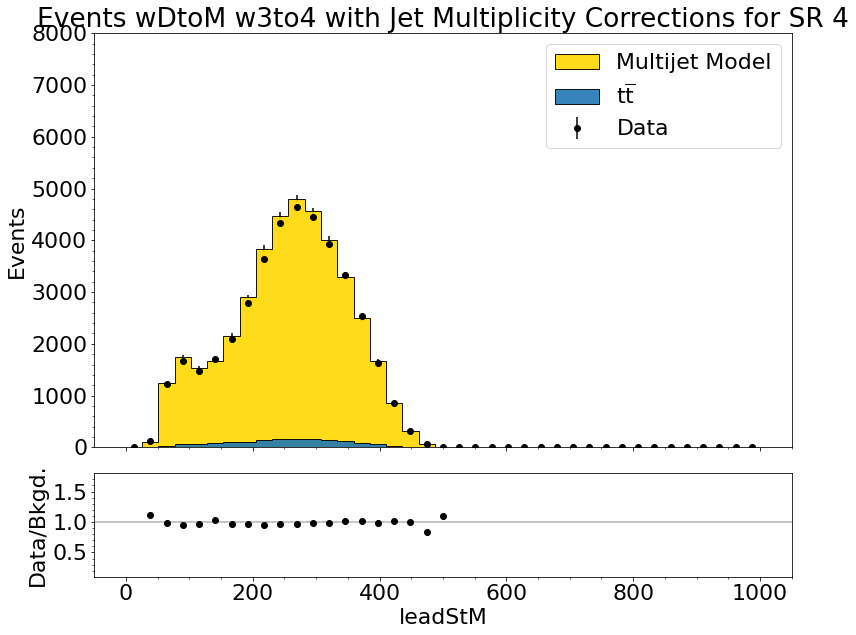

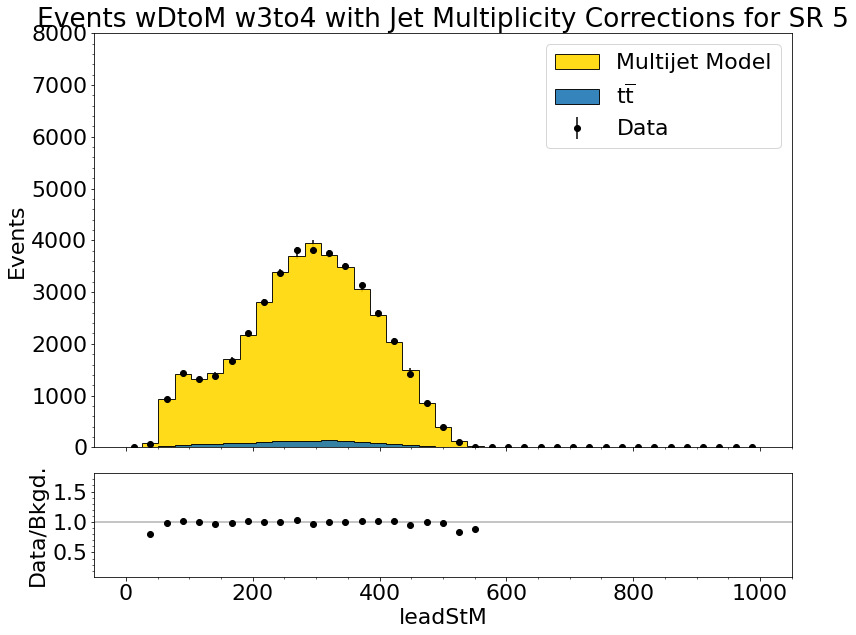

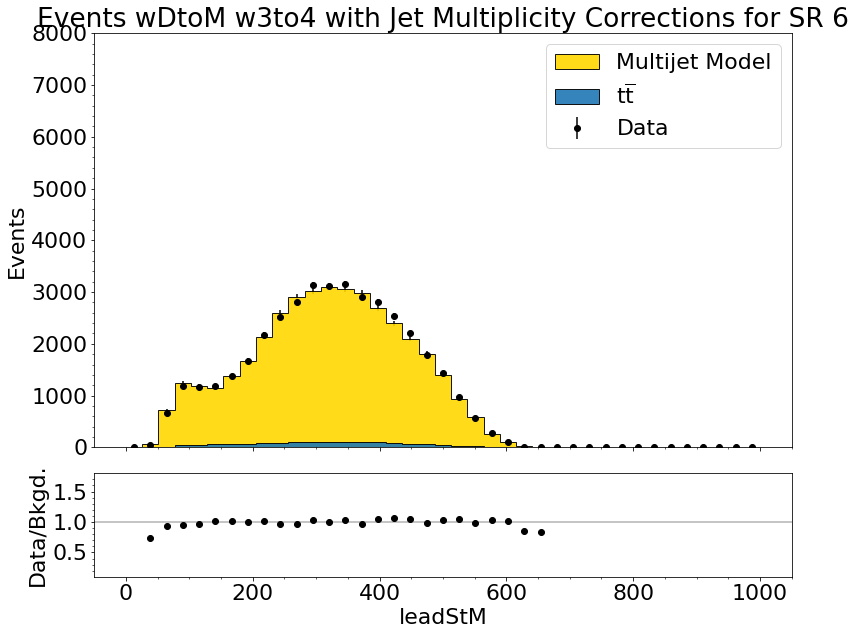

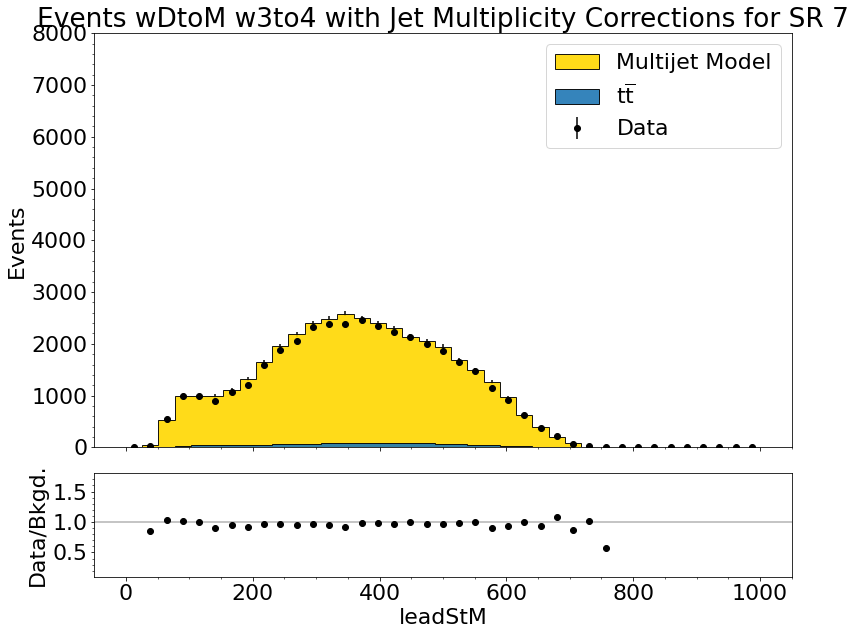

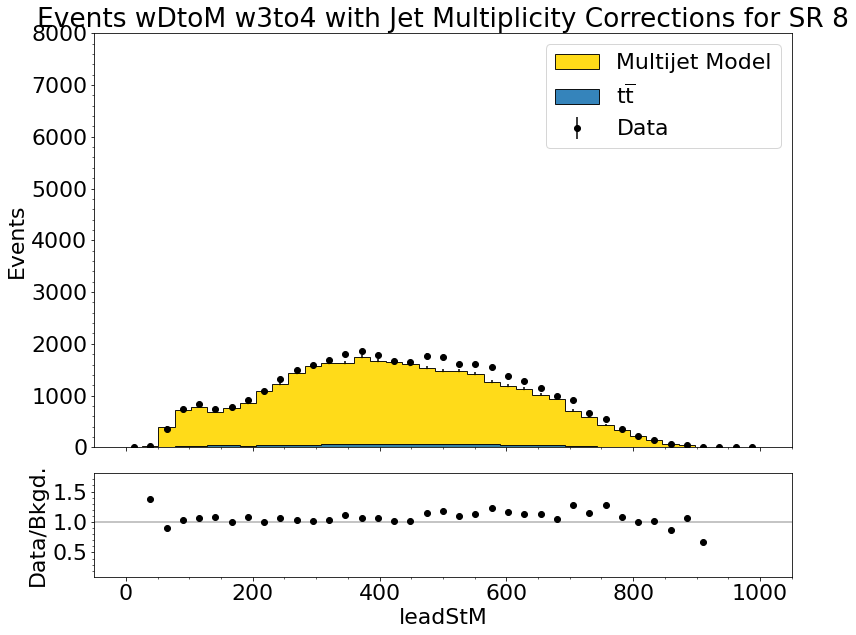

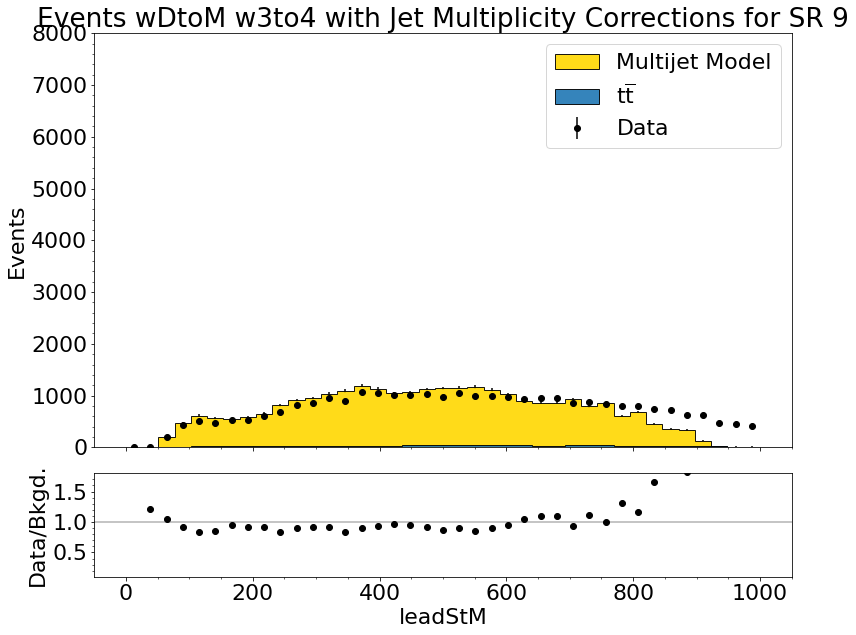

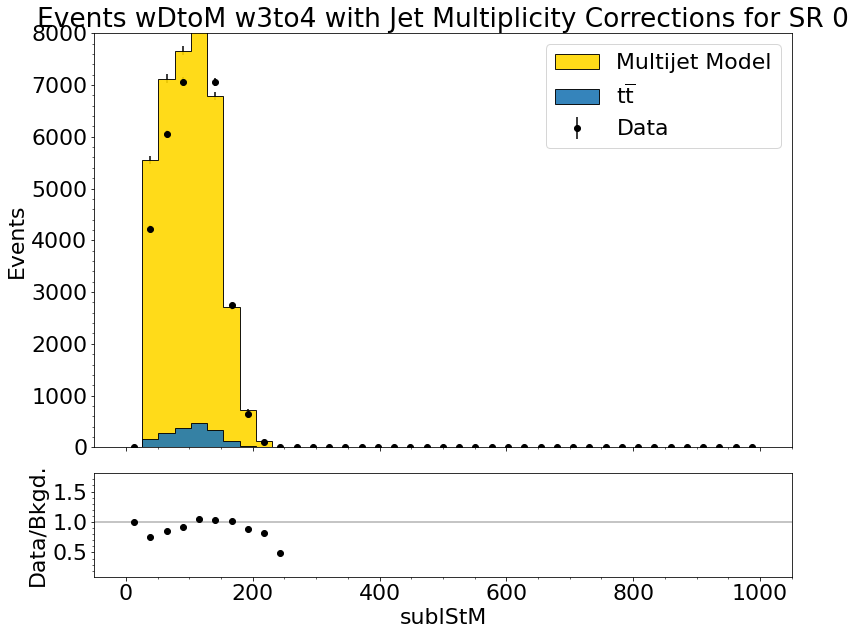

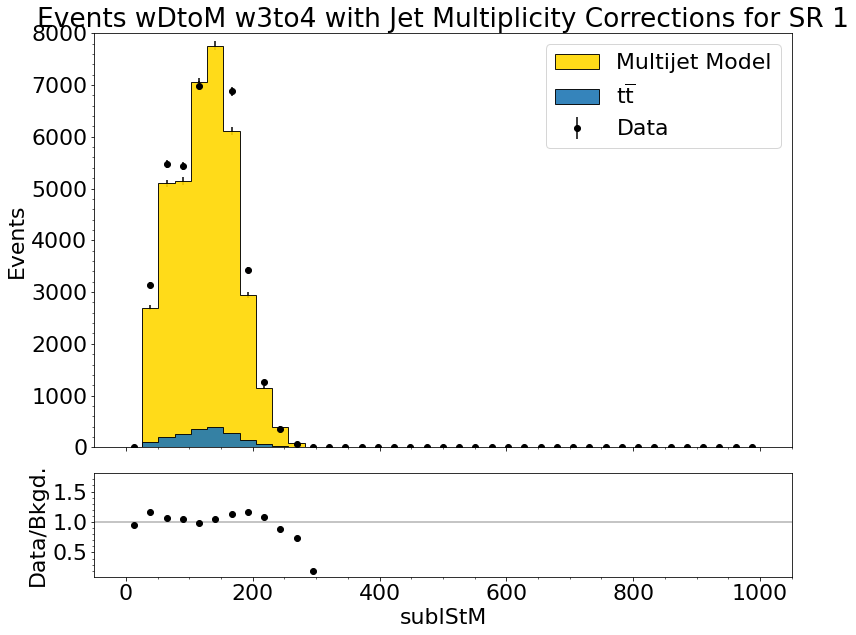

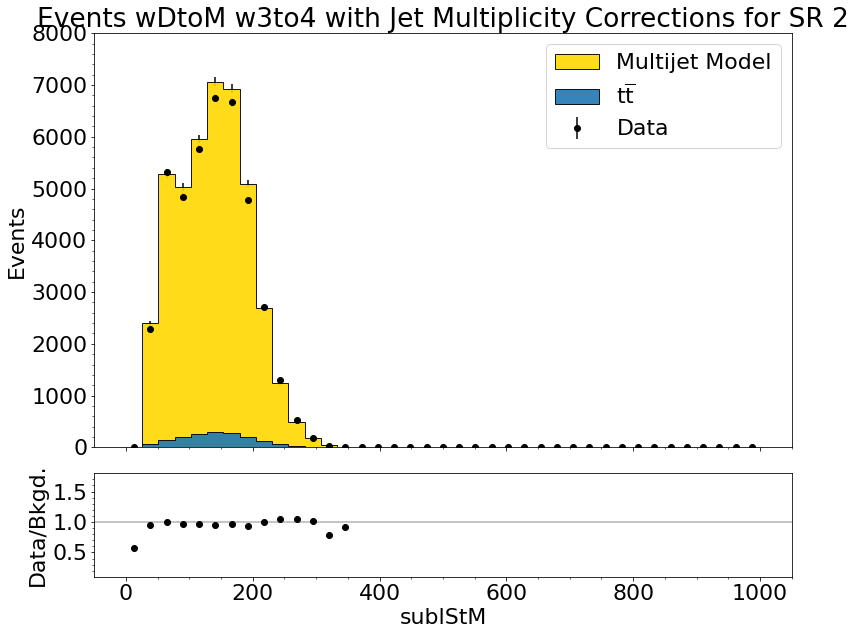

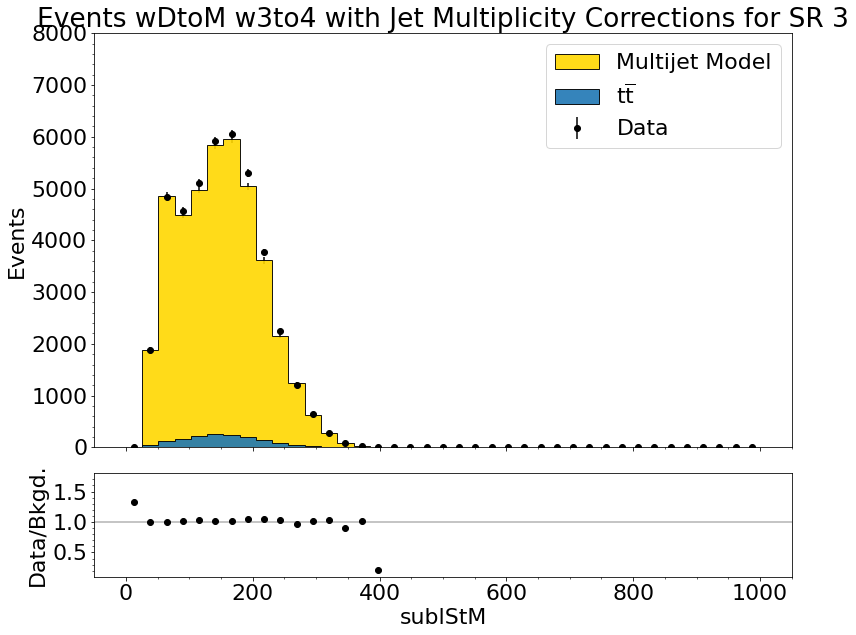

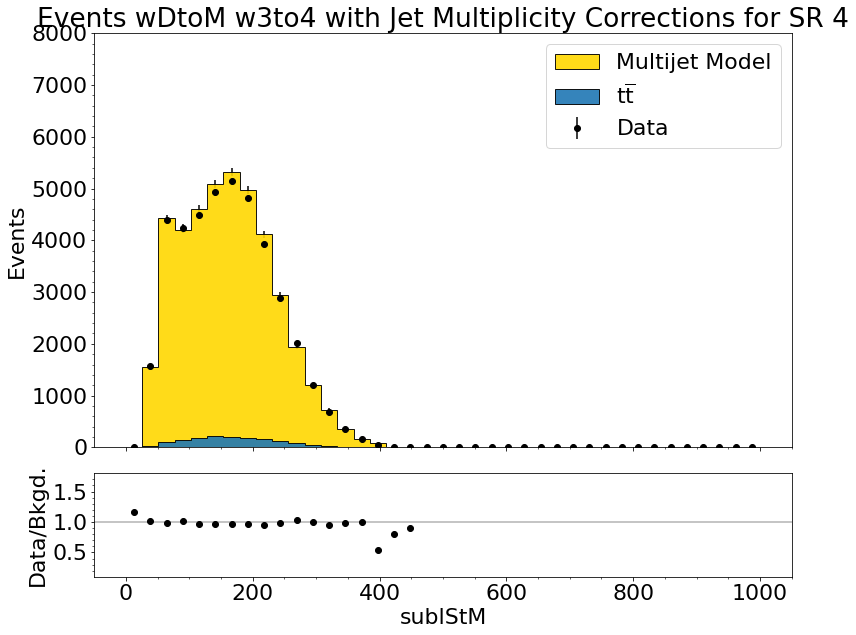

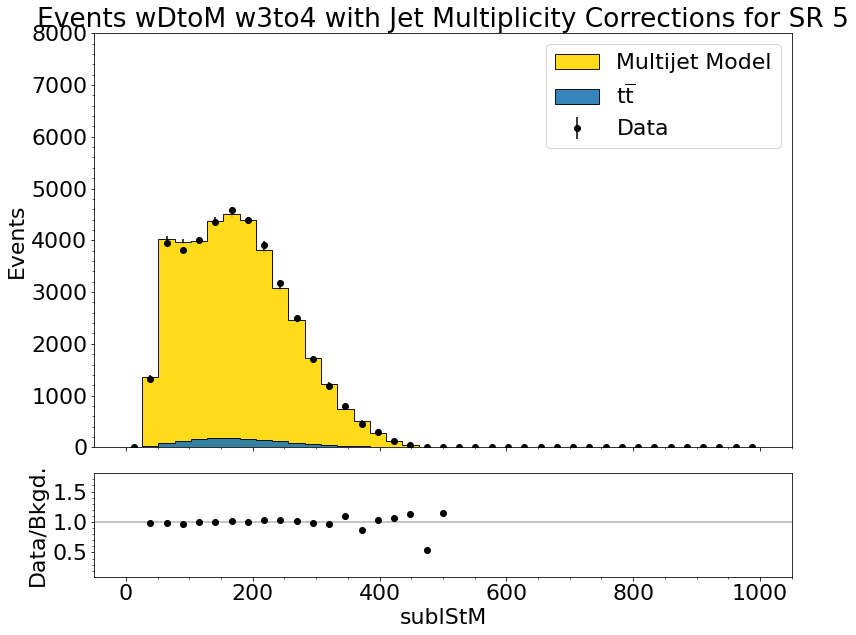

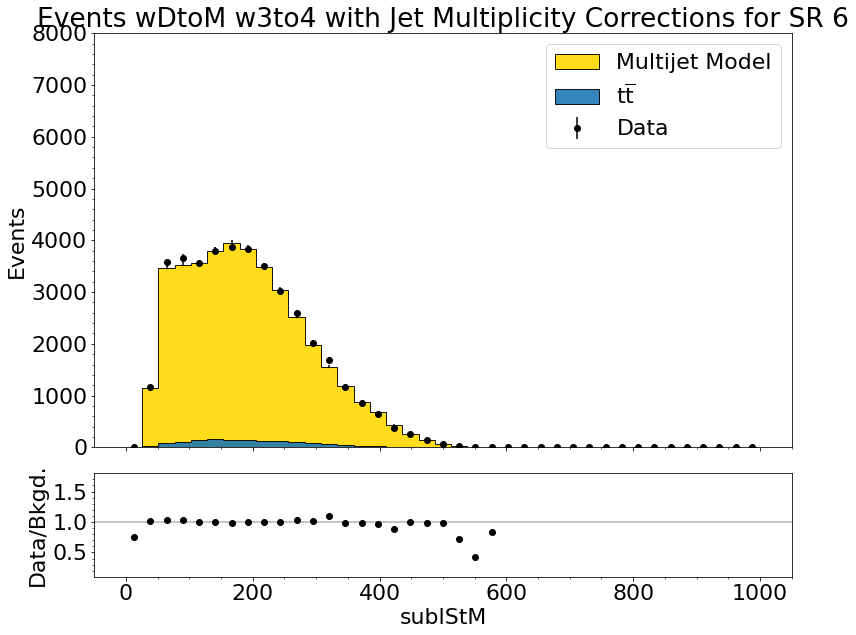

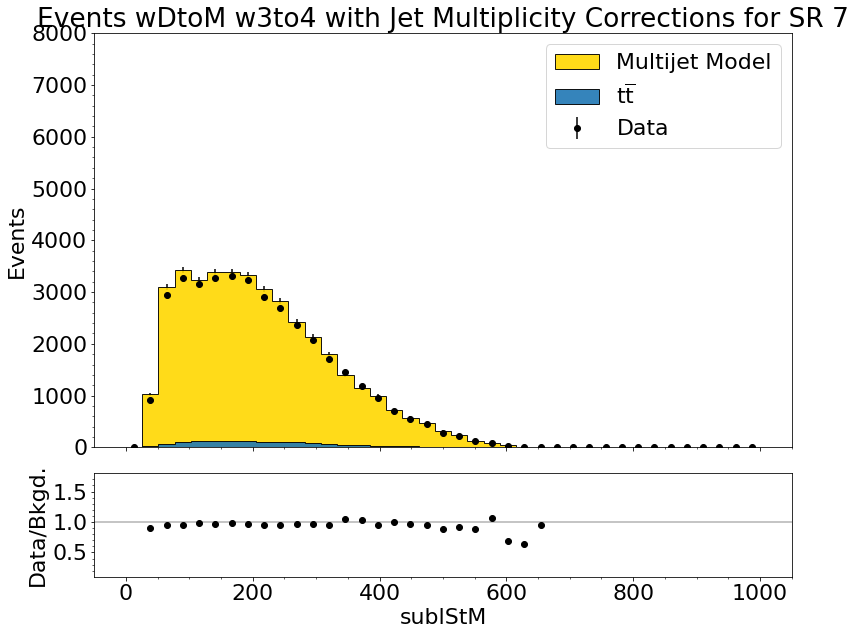

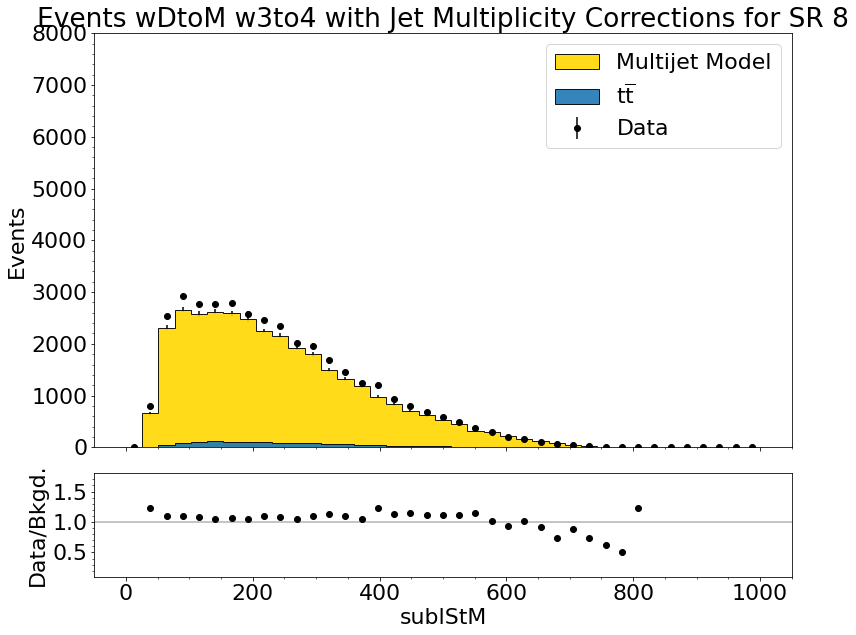

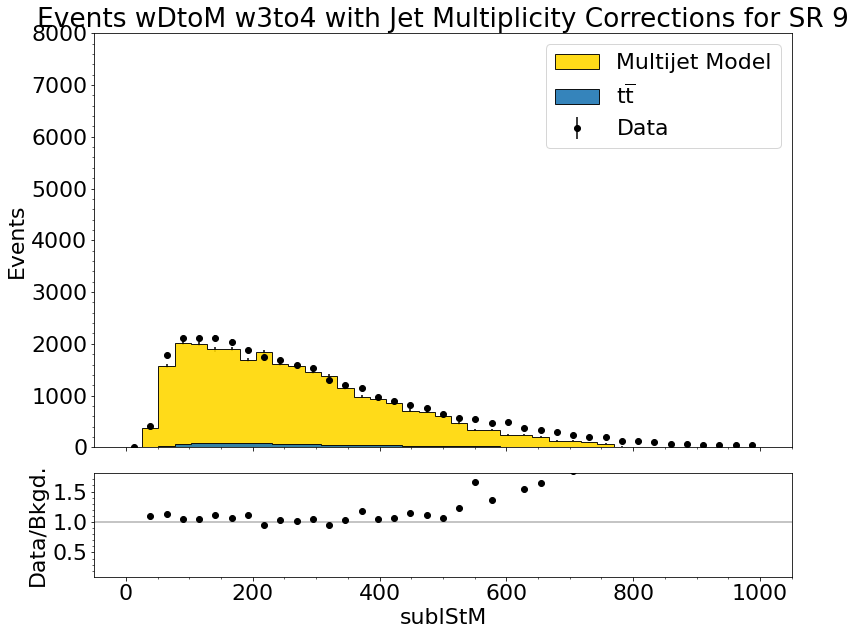

In [31]:
for v, var in enumerate(varArr):
    if var == 'm4j':
        continue
    pp = PdfPages(var + "SR_Pre.pdf")
    for SR in range(10):
#         figf,axs = makePlot(np.sum(data4b[:,v],axis=0)[SR], np.sum(data3b[:,v],axis=0)[SR]-np.sum(ttbar3b[:,v],axis=0)[SR], ttbar4b = np.sum(ttbar4b[:,v],axis=0)[SR], title = 'wJCM  SR '+str(SR), var=var)
        figf,axs = makePlot(np.sum(data4b[:,v],axis=0)[SR], np.sum(data3bw3to4[:,v],axis=0)[SR], ttbar4b = np.sum(ttbar4b[:,v],axis=0)[SR], title = 'wDtoM w3to4 with Jet Multiplicity Corrections for SR '+str(SR),var=var)
        axs[0].set_ylim(bottom=0.0, top=8000)
        if var == 'nSelJets':
            axs[0].set_ylim(bottom=0.0, top=20000)
        pp.savefig(figf)
        plt.show();plt.close()
    pp.close()


In [13]:
def plotClosure(data, DtoM, ttbar, title = '', var = None, m4jMax = 1800, dijetLim = 1000, m4jBinEdges = m4jBinEdges, tag3 = False):
    plt.rcParams.update({'font.size': 22})
    figf, axs = plt.subplots(2, 1, sharex = True, figsize=(12.5,10), gridspec_kw={'height_ratios': [0.8,0.2]})
    plt.subplots_adjust(hspace=0.1)
    if var =='leadStM' or var == 'sublStM':
        dijetLim = 1000

    axs[0].set_ylabel("Events")
    axs[1].set_ylabel("wDtoM/(data-ttbar)")
    bins = getBinByVar(var, m4jMax = m4jMax, dijetLim=dijetLim)
    bincenter = 0.5*(bins[:-1] + bins[1:])

    varHist = axs[0].hist(np.append(bins[:-1],bins[:-1]), bins=bins, weights=np.append(-ttbar, data), label="data - ttbar", color='gold',  fill=True, alpha = 0.9, histtype='step', edgecolor='k')
    axs[0].hist(bins[:-1], bins=bins, weights = data, label="data", hatch='/', fill=False,  alpha = 0.9, histtype='step', edgecolor='k')
    axs[0].errorbar(bincenter, DtoM, yerr=np.sqrt(DtoM),  marker='o', color='k', label='wDtoM', ls='none')
    axs[0].set_title('Closure for Events ' + title)
    axs[0].legend(); 
    
    axs[1].plot(bincenter, np.divide(DtoM,varHist[0], where=varHist[0]!=0), marker='o', color='k')
    axs[1].axhline(1,color='k',linestyle='-', alpha=0.3)
    axs[1].set_ylim(bottom=0.1, top=1.8)
    plt.xlabel(var)

              
    for p in [0,1]:
        axs[p].minorticks_on()
        if var == 'm4j':
            axs[p].axvline(m4jBinEdges[1][0],color='k',linestyle='--')
            axs[p].axvline(m4jBinEdges[-2][1],color='k',linestyle='--')
            axs[p].axvline(m4jBinEdges[-1][1],color='k',linestyle='--', alpha=0.3)
            for i in range(len(m4jBinEdges)):
                axs[p].axvline(m4jBinEdges[i][0],color='k',linestyle='--', alpha=0.3)
            plt.xlabel(var+ " (GeV)")
#             axs[0].set_ylim(bottom=0.0, top=450000)
#             if tag3 is False:
#                 axs[0].set_ylim(bottom=0.0, top=23100)
#     if var == 'nSelJets' and ttbar is not None:
#         axs[0].set_ylim(bottom=0.0, top=155000)

    return figf, axs


In [19]:
data4bwDtoM = np.array([getHistBincontent(*getSelDataW(dataMixFilename[i], wDtoMFilename = wDtoM4bFilename[i]), var=varArr, wJCM=wJCM , inc=inc) for i in range(len(yearArr))])
data3bwDtoM = np.array([getHistBincontent(*getSelDataW(data3bFilename[i], wDtoMFilename = wDtoMFilename[i]), var=varArr, wJCM=wJCM , inc=inc) for i in range(len(yearArr))])

/tmp/ipykernel_27547/1187583237.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data4bwDtoM = np.array([getHistBincontent(*getSelDataW(dataMixFilename[i], wDtoMFilename = wDtoM4bFilename[i]), var=varArr, wJCM=wJCM , inc=inc) for i in range(len(yearArr))])
/tmp/ipykernel_27547/1187583237.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data3bwDtoM = np.array([getHistBincontent(*getSelDataW(data3bFilename[i], wDtoMFilename = wDtoMFilename[i]), var=varArr, wJCM=wJCM , inc=inc) for i in range(len(yearArr))])


/cvmfs/sft.cern.ch/lcg/views/LCG_102/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cvmfs/sft.cern.ch/lcg/views/LCG_102/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


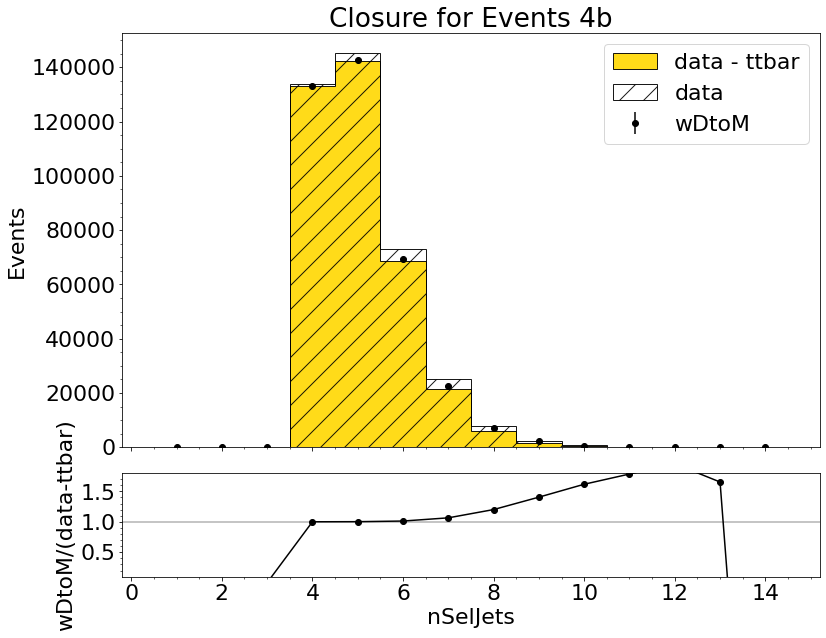

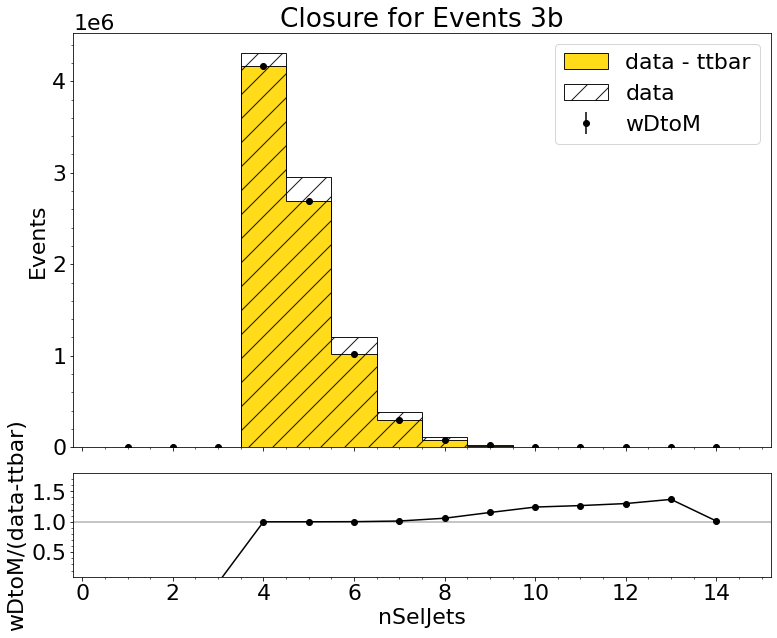

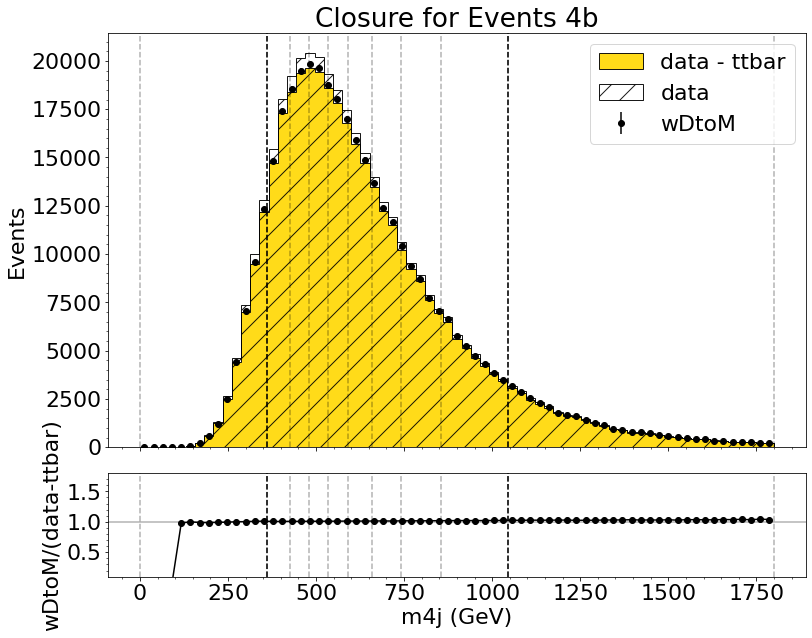

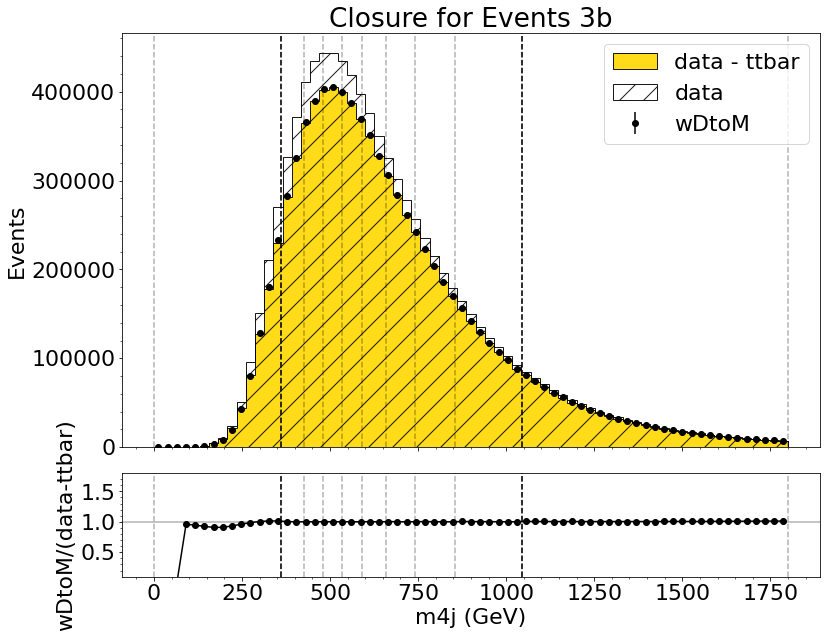

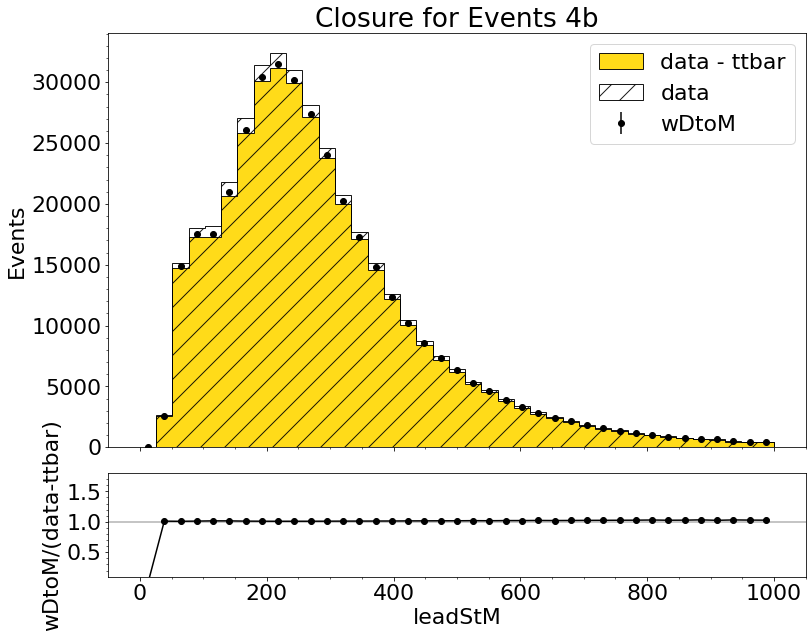

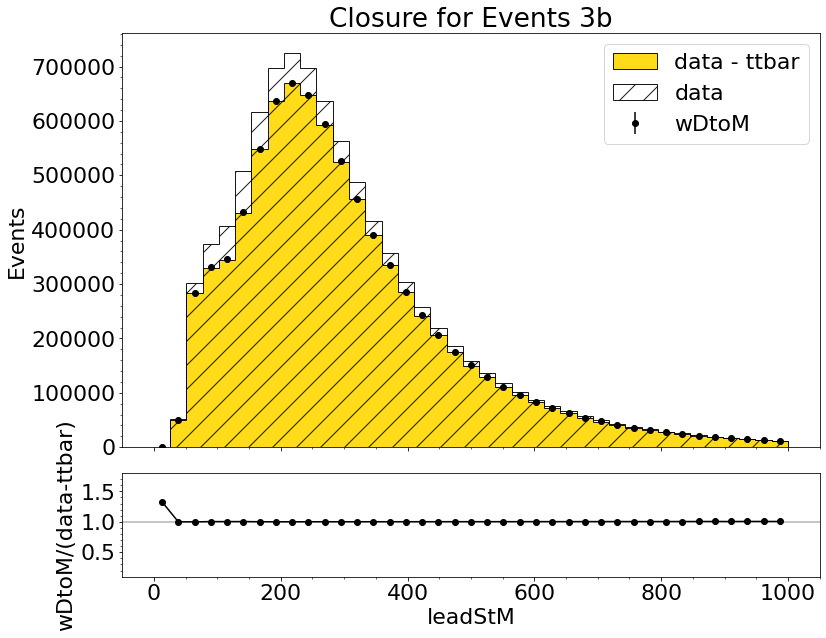

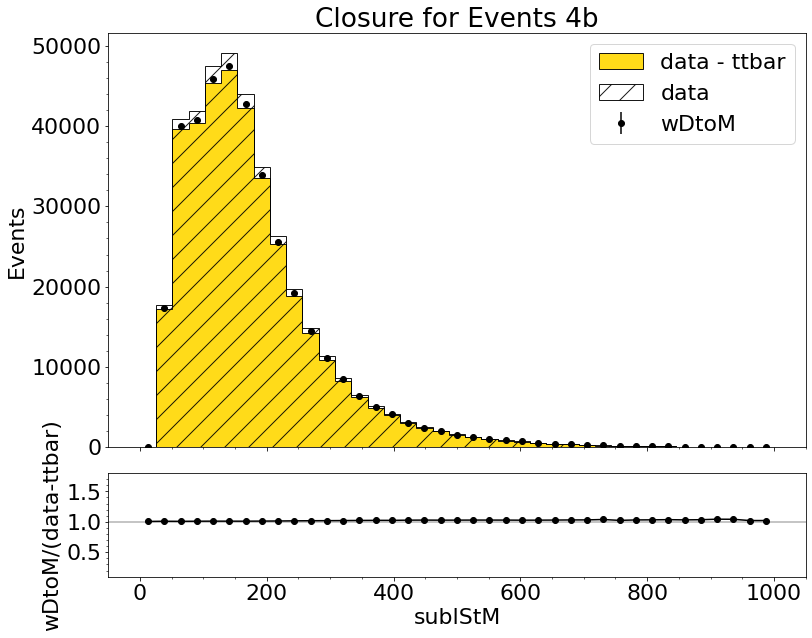

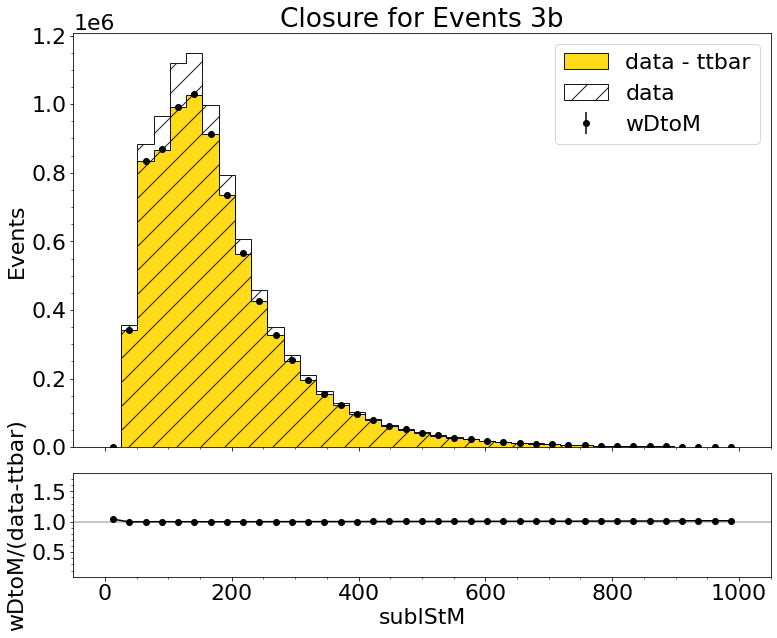

In [20]:
pp = PdfPages("closureTestKDE.pdf")
for v, var in enumerate(varArr):
    temp,_ = plotClosure(np.sum(np.sum(data4b[:,v],axis=0),axis=0), np.sum(np.sum(data4bwDtoM[:,v],axis=0),axis=0), ttbar = np.sum(np.sum(ttbar4b[:,v],axis=0),axis=0), title = '4b',var=var)
    pp.savefig(temp)
    plt.show();plt.close()
    temp,_ = plotClosure(np.sum(np.sum(data3b[:,v],axis=0),axis=0), np.sum(np.sum(data3bwDtoM[:,v],axis=0),axis=0), ttbar = np.sum(np.sum(ttbar3b[:,v],axis=0),axis=0), title = '3b',var=var, tag3 = True)
    pp.savefig(temp)
    plt.show();plt.close()

pp.close()


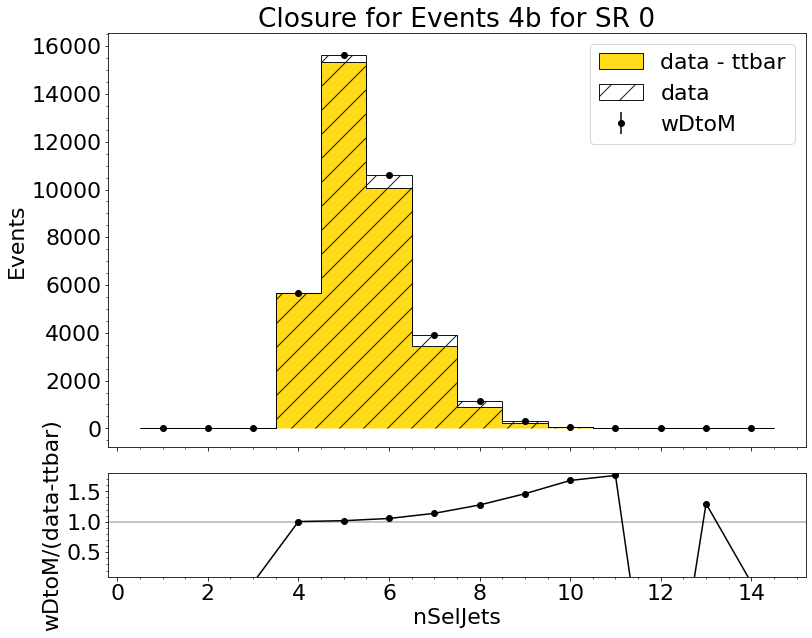

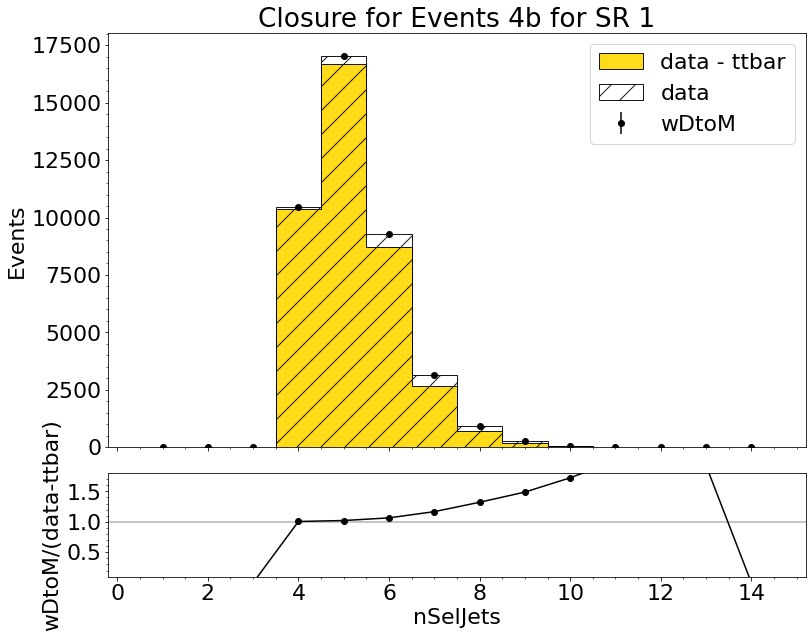

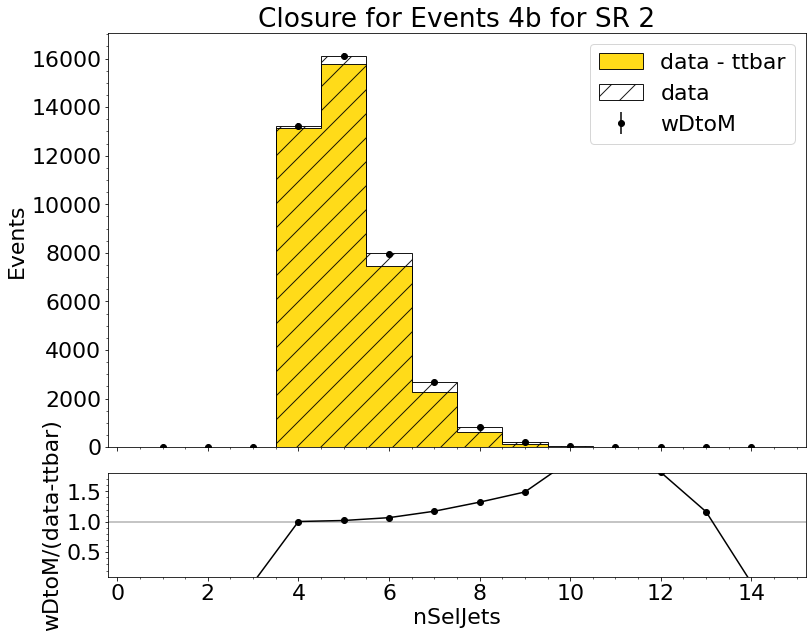

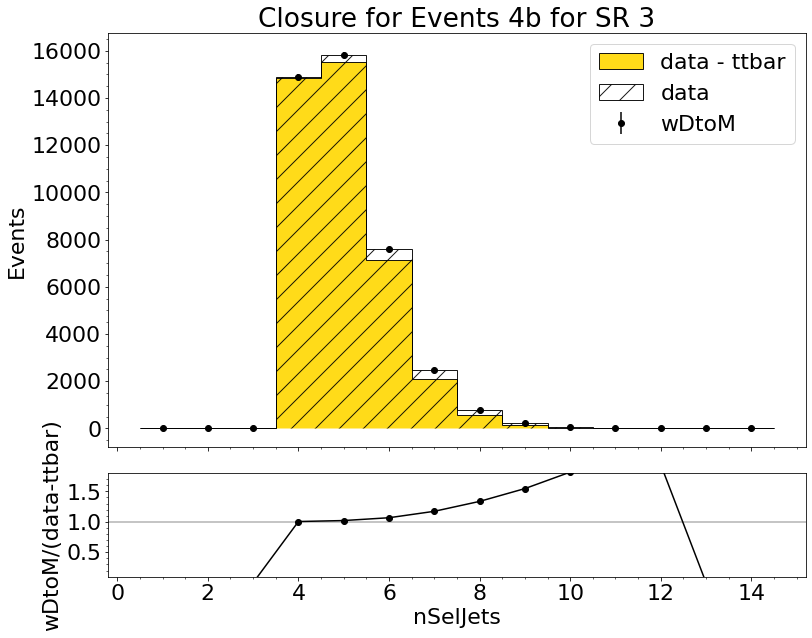

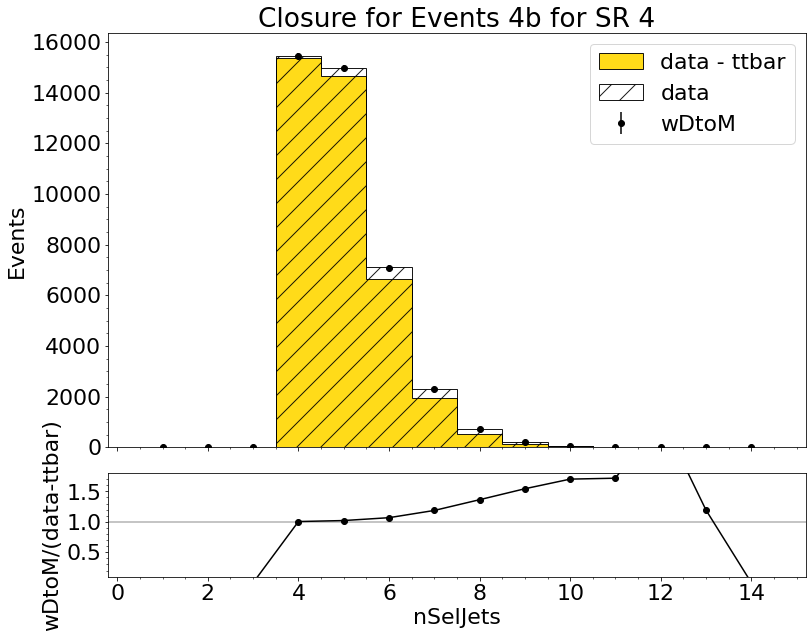

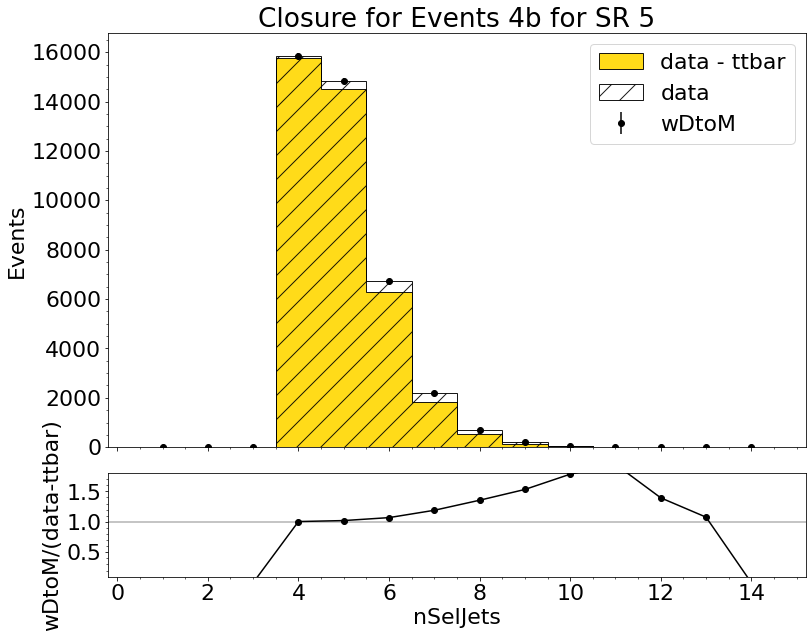

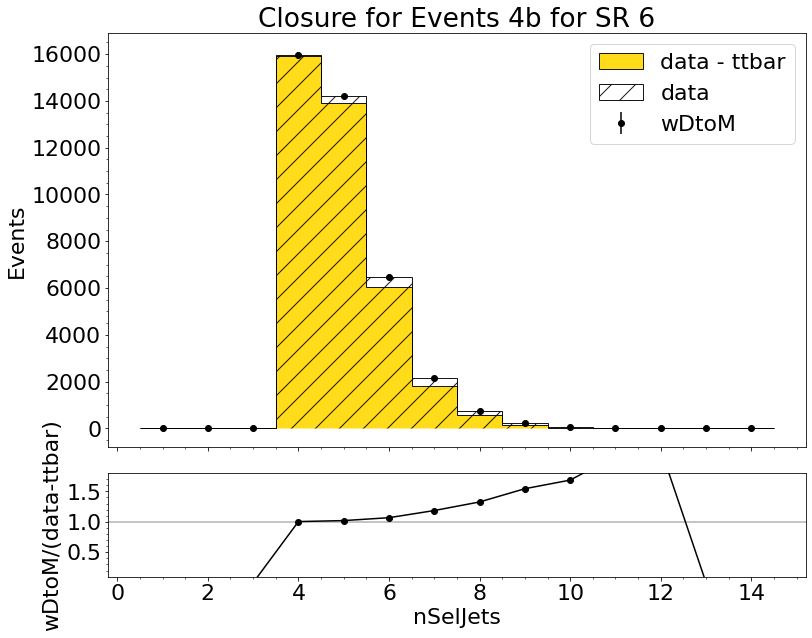

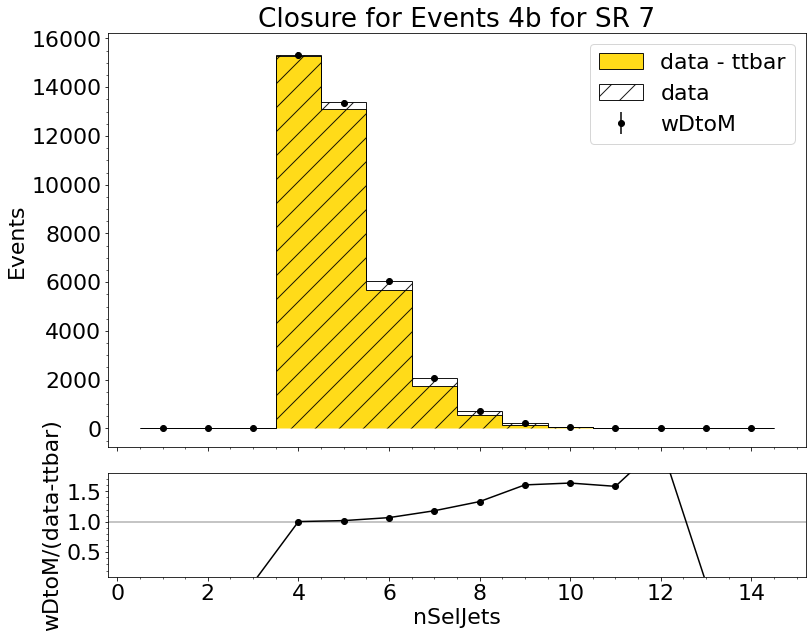

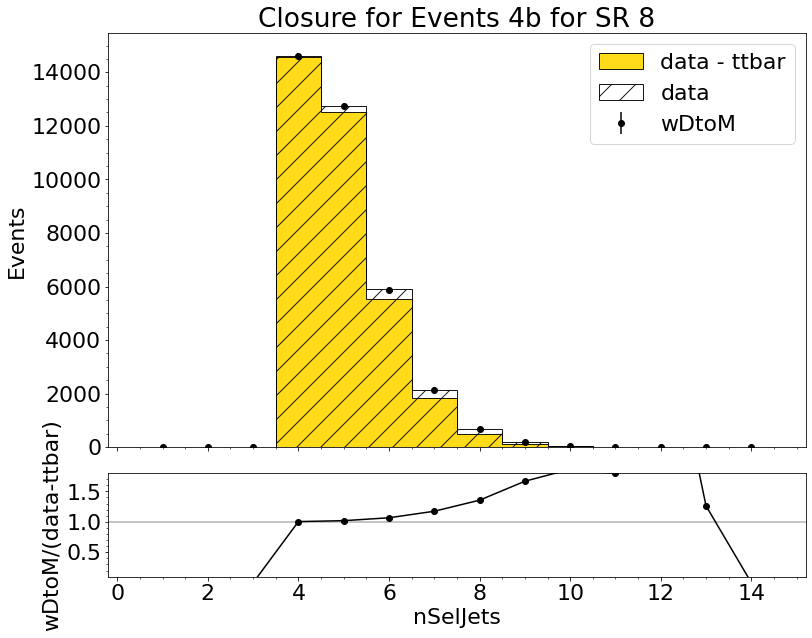

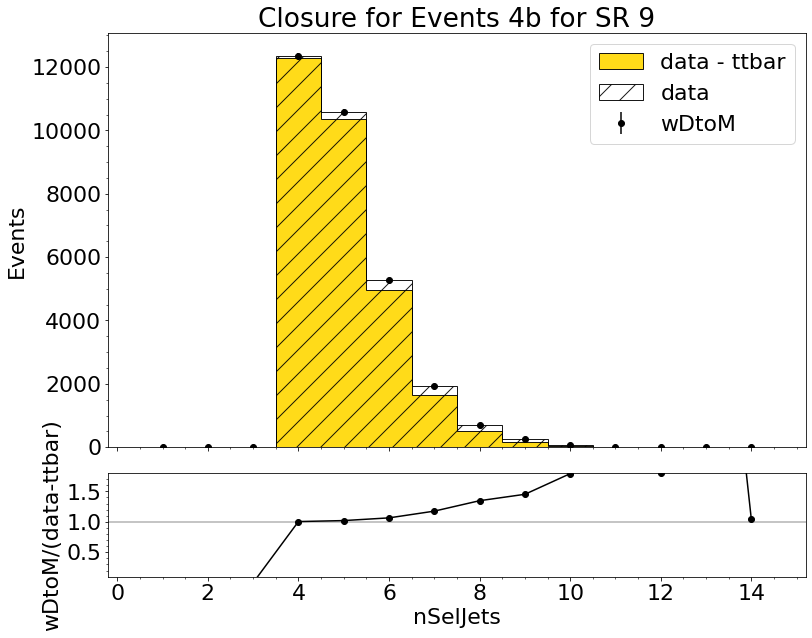

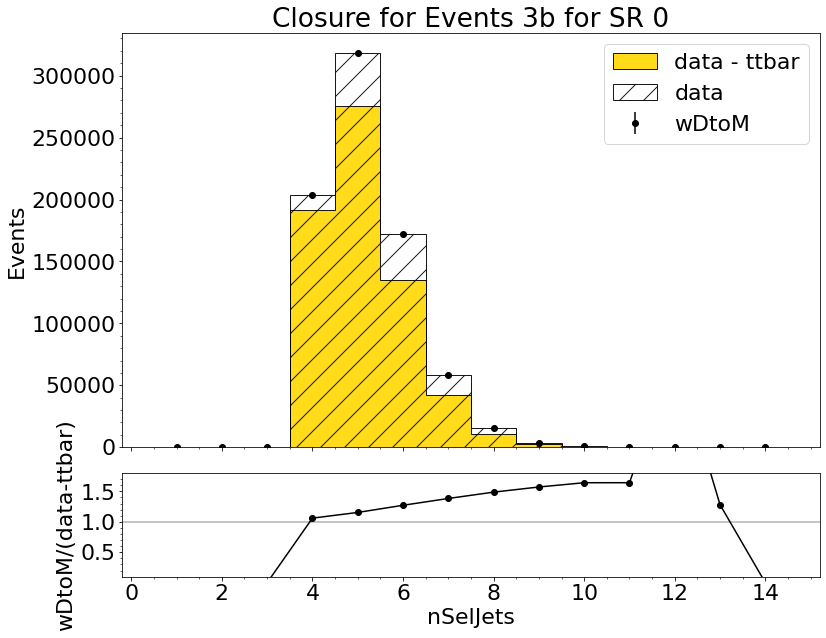

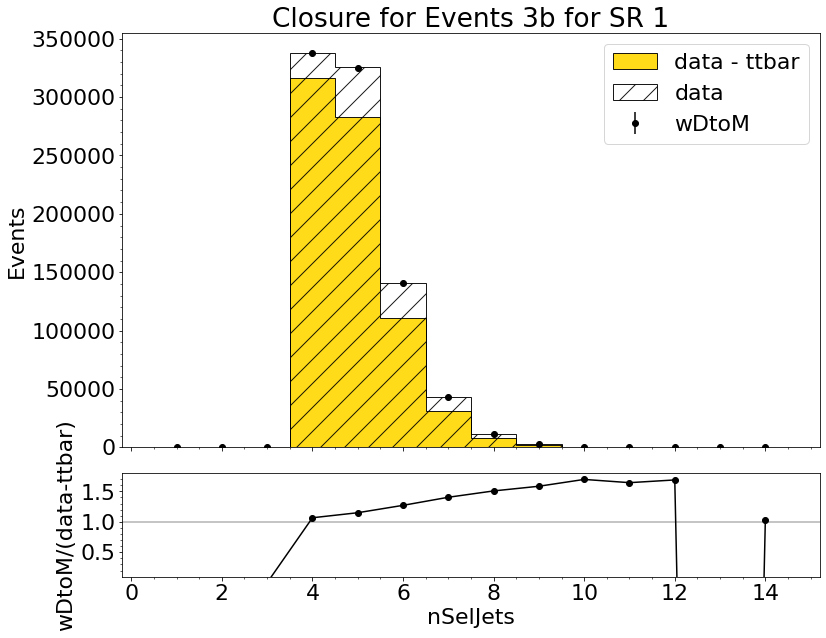

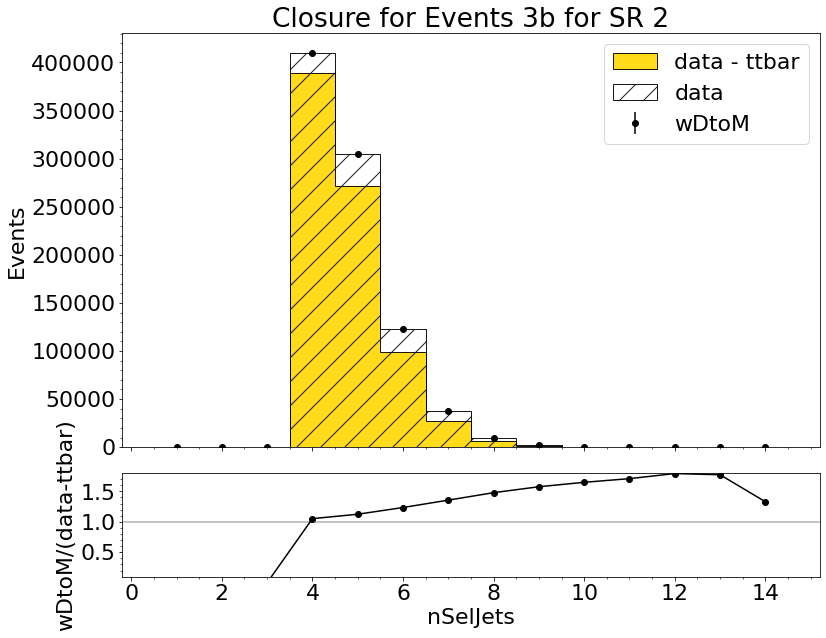

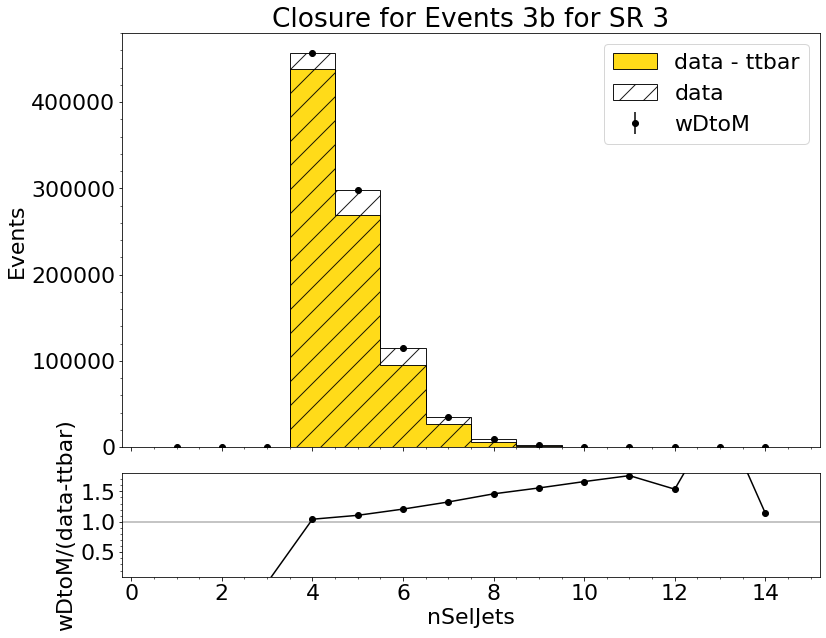

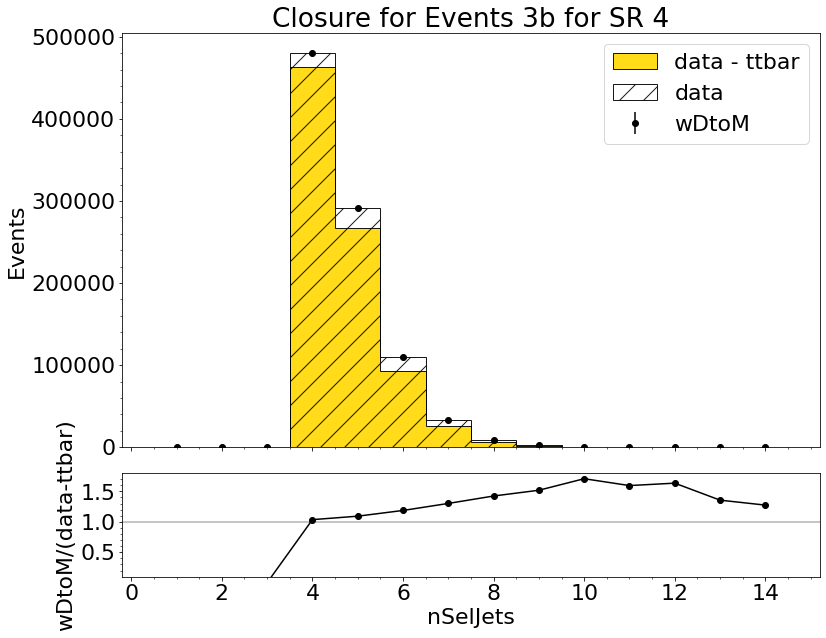

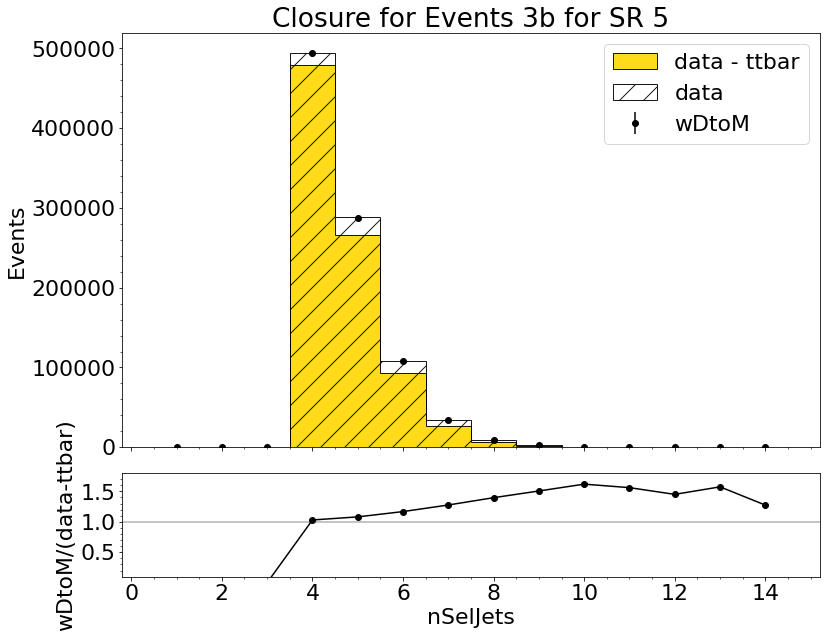

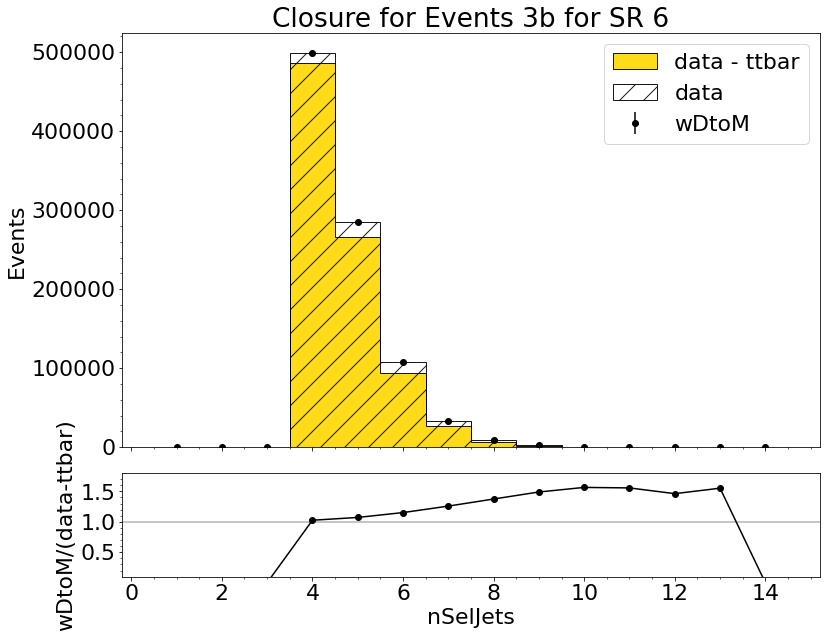

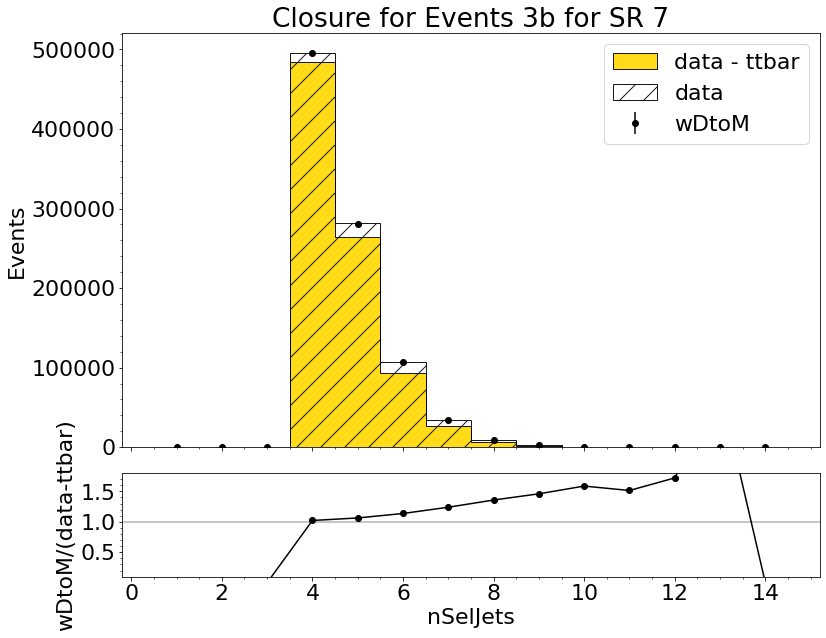

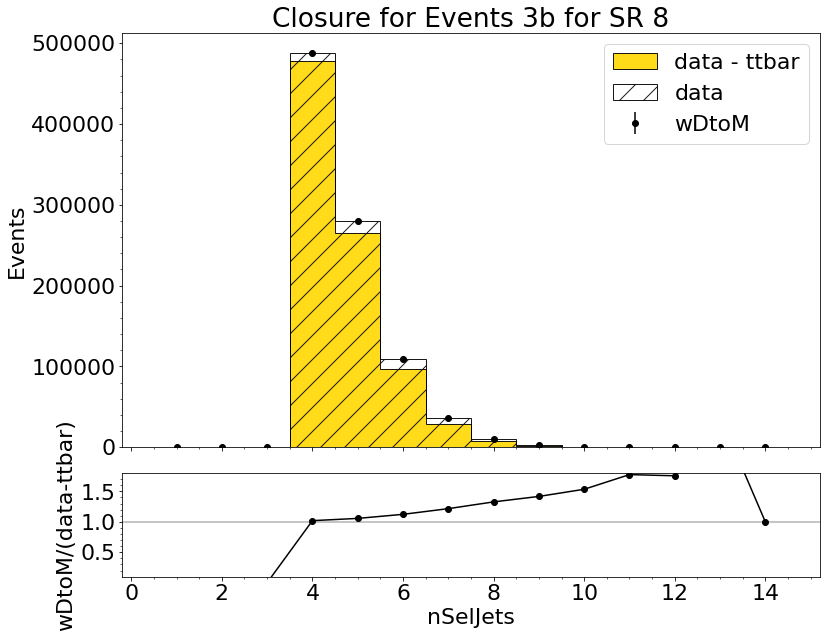

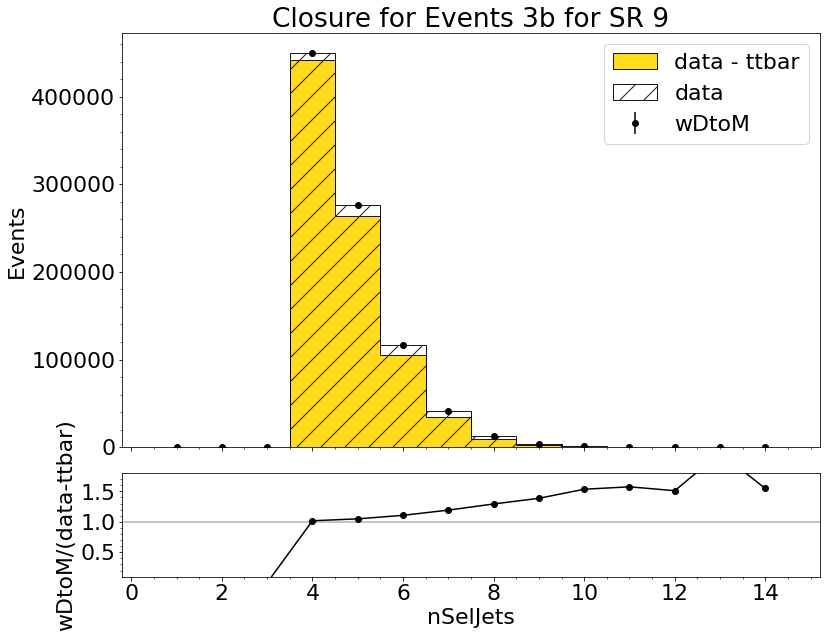

In [15]:
pp = PdfPages("closureTestSRkNN.pdf")
for v, var in enumerate(['nSelJets']):
    for SR in range(10):
        temp,_ = plotClosure(np.sum(data4b[:,v],axis=0)[SR], np.sum(data4bwDtoM[:,v],axis=0)[SR], ttbar = np.sum(ttbar4b[:,v],axis=0)[SR], title = '4b for SR '+str(SR),var=var)
        pp.savefig(temp)
        plt.show();plt.close()
    for SR in range(10):
        temp,_ = plotClosure(np.sum(data3b[:,v],axis=0)[SR], np.sum(data3bwDtoM[:,v],axis=0)[SR], ttbar = np.sum(ttbar3b[:,v],axis=0)[SR], title = '3b for SR '+str(SR),var=var, tag3 = True)
        pp.savefig(temp)
        plt.show();plt.close()

pp.close()


In [18]:
f.arrays('m4j')

<Array [{m4j: 326}, ... {m4j: 524}] type='399004 * {"m4j": float32}'>

In [1]:
dat1 = 'root://cmseos.fnal.gov//store/user/jda102/condor/ZH4b/ULTrig/ZH4b2018/picoAOD_wTrigWeights.root'
dat2 = 'root://cmseos.fnal.gov//store/user/jda102/condor/ZH4b/ULTrig/ZH4b2018/picoAOD.root'
# dat3 = "root://cmseos.fnal.gov//store/user/smurthy/condor/unsupervised4b/randPair/files/TTTo2L2Nu2017_4b_noPSData_wTrigW_picoAOD_4b_wJCM_newSBDef.root"
# dat3 = "root://cmseos.fnal.gov//store/user/jda102/condor/ZH4b/ULTrig/TTTo2L2Nu2017_4b_noPSData_wTrigW/picoAOD_4b_wJCM_newSBDef.root"



In [ ]:
eosls root://cmsxrootd.fnal.gov//store/user/jda102/condor/ZH4b/ULTrig/TTTo2L2Nu2017_4b_noPSData_wTrigW/

In [2]:
f = uproot.open(dat2)['Events']

NameError: name 'uproot' is not defined

In [ ]:
b = f.arrays(['m4j', 'weight' ,'genWeight'])

In [7]:
sum(b['weight'])

317.7932779637631

In [10]:
genWeight = (b['genWeight'])

In [11]:
xs = 88.3419033256
lumi = 36.7338

In [13]:
weight = genWeight * (lumi * xs / sum(genWeight))

In [14]:
weight

<Array [0.207, 0.209, 0.209, ... 0.208, 0.209] type='15630 * float32'>

/cvmfs/sft.cern.ch/lcg/views/LCG_102/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cvmfs/sft.cern.ch/lcg/views/LCG_102/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


(array([2.476e+03, 3.375e+03, 5.861e+03, 2.850e+03, 7.810e+02, 2.080e+02,
        5.700e+01, 1.800e+01, 3.000e+00, 1.000e+00]),
 array([0.        , 0.00012079, 0.00024159, 0.00036238, 0.00048318,
        0.00060397, 0.00072477, 0.00084556, 0.00096636, 0.00108715,
        0.00120795], dtype=float32),
 <BarContainer object of 10 artists>)

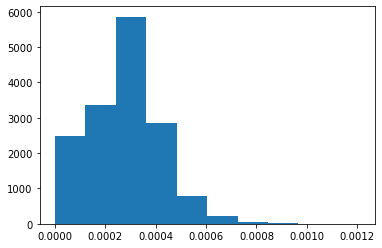

In [19]:
plt.hist(b['weight']/b['genWeight'])

In [21]:
f.keys()

['run',
 'luminosityBlock',
 'event',
 'nElectron',
 'Electron_dr03EcalRecHitSumEt',
 'Electron_dr03HcalDepth1TowerSumEt',
 'Electron_dr03TkSumPt',
 'Electron_eCorr',
 'Electron_eInvMinusPInv',
 'Electron_eta',
 'Electron_hoe',
 'Electron_mass',
 'Electron_miniPFRelIso_all',
 'Electron_miniPFRelIso_chg',
 'Electron_mvaFall17V1Iso',
 'Electron_mvaFall17V1noIso',
 'Electron_mvaFall17V2Iso',
 'Electron_mvaFall17V2noIso',
 'Electron_pfRelIso03_all',
 'Electron_pfRelIso03_chg',
 'Electron_phi',
 'Electron_pt',
 'Electron_r9',
 'Electron_scEtOverPt',
 'Electron_sieie',
 'Electron_cutBased',
 'Electron_cutBased_Fall17_V1',
 'Electron_pdgId',
 'Electron_convVeto',
 'Electron_mvaFall17V2Iso_WP80',
 'Electron_mvaFall17V2Iso_WP90',
 'Electron_mvaFall17V2Iso_WPL',
 'nGenJet',
 'GenJet_eta',
 'GenJet_mass',
 'GenJet_phi',
 'GenJet_pt',
 'nGenPart',
 'GenPart_eta',
 'GenPart_mass',
 'GenPart_phi',
 'GenPart_pt',
 'GenPart_genPartIdxMother',
 'GenPart_pdgId',
 'genWeight',
 'nJet',
 'Jet_area',
 'Jet

In [16]:
weight/b['weight']

/cvmfs/sft.cern.ch/lcg/views/LCG_102/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/awkward/_connect/_numpy.py:209: RuntimeWarning: divide by zero encountered in true_divide
  result = getattr(ufunc, method)(


<Array [16.3, 10.5, 9.69, ... 5.01, 13.9, 11.3] type='15630 * float32'>

(array([2.13437539e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.78063647e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.39984046e-03, 2.02168658e-01,
        2.03541732e+00, 6.09186316e+00, 1.07196999e+01, 1.35827341e+01,
        1.20885239e+01, 9.14150143e+00, 6.19863892e+00, 4.21881580e+00,
        2.72620630e+00, 1.71822286e+00, 1.15426302e+00, 7.65911937e-01,
        5.63753307e-01, 4.03455347e-01, 2.90393502e-01, 2.14461982e-01,
        1.70683488e-01, 1.28631383e-01, 1.02426007e-01, 7.46358484e-02,
        6.34903982e-02, 3.95292453e-02, 3.36157829e-02, 3.04592419e-02,
        2.60382500e-02, 1.46386661e-02, 1.28307501e-02, 1.32557256e-02,
        8.29624943e-03, 8.81935842e-03, 4.68969857e-03, 6.27282728e-03,
        4.43019671e-03, 6.96112635e-03, 2.88088480e-03, 2.00489862e-03,
        5.15978271e-03, 5.93530945e-04, 8.49158911e-04, 5.204802

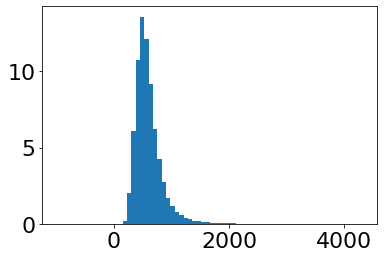

In [21]:
plt.hist(f.arrays('m4j')['m4j'], bins=70, weights = f.arrays('weight')['weight'] )

In [22]:
f.arrays('m4j')['m4j']

<Array [326, 337, 729, 390, ... 406, 385, 524] type='399004 * float32'>

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+00,
        3.0060e+03, 5.6375e+04, 9.5536e+04, 7.9771e+04, 5.5484e+04,
        3.6546e+04, 2.4340e+04, 1.5660e+04, 1.0515e+04, 6.8080e+03,
        4.3210e+03, 2.9540e+03, 1.9760e+03, 1.4690e+03, 1.0520e+03,
        7.4900e+02, 5.5700e+02, 4.3500e+02, 3.1900e+02, 2.5800e+02,
        1.8800e+02, 1.4900e+02, 9.4000e+01, 7.9000e+01, 7.3000e+01,
        5.9000e+01, 3.5000e+01, 3.3000e+01, 3.1000e+01, 2.0000e+01,
        1.8000e+01, 1.0000e+01, 1.3000e+01, 9.0000e+00, 1.5000e+01,
        5.0000e+00, 5.0000e+00, 1.1000e+01, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-9.8409955e+02, -9.0842676e+02, -8.327

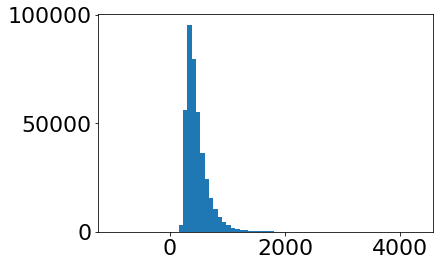

In [19]:
plt.hist(f.arrays('m4j')['m4j'], bins=70)

In [16]:
f.keys()

['run',
 'luminosityBlock',
 'event',
 'nElectron',
 'Electron_dr03EcalRecHitSumEt',
 'Electron_dr03HcalDepth1TowerSumEt',
 'Electron_dr03TkSumPt',
 'Electron_eCorr',
 'Electron_eInvMinusPInv',
 'Electron_eta',
 'Electron_hoe',
 'Electron_mass',
 'Electron_miniPFRelIso_all',
 'Electron_miniPFRelIso_chg',
 'Electron_mvaFall17V1Iso',
 'Electron_mvaFall17V1noIso',
 'Electron_mvaFall17V2Iso',
 'Electron_mvaFall17V2noIso',
 'Electron_pfRelIso03_all',
 'Electron_pfRelIso03_chg',
 'Electron_phi',
 'Electron_pt',
 'Electron_r9',
 'Electron_scEtOverPt',
 'Electron_sieie',
 'Electron_cutBased',
 'Electron_cutBased_Fall17_V1',
 'Electron_pdgId',
 'Electron_convVeto',
 'Electron_mvaFall17V2Iso_WP80',
 'Electron_mvaFall17V2Iso_WP90',
 'Electron_mvaFall17V2Iso_WPL',
 'nGenJet',
 'GenJet_eta',
 'GenJet_mass',
 'GenJet_phi',
 'GenJet_pt',
 'nGenPart',
 'GenPart_eta',
 'GenPart_mass',
 'GenPart_phi',
 'GenPart_pt',
 'GenPart_genPartIdxMother',
 'GenPart_pdgId',
 'genWeight',
 'nJet',
 'Jet_area',
 'Jet

In [ ]:
xs = 0.7612*0.5824*0.1512
lumiDict = {'2016':  36.3e3,#35.8791
              '2016_preVFP': 19.5e3,
              '2016_postVFP': 16.5e3,
              '2017':  36.7e3,#36.7338
              '2018':  59.8e3,#59.9656
              'RunII':132.8e3,
              }

In [27]:
g = uproot.open(dat2)['Events']
g.keys()

['run',
 'luminosityBlock',
 'event',
 'nElectron',
 'Electron_dr03EcalRecHitSumEt',
 'Electron_dr03HcalDepth1TowerSumEt',
 'Electron_dr03TkSumPt',
 'Electron_eCorr',
 'Electron_eInvMinusPInv',
 'Electron_eta',
 'Electron_hoe',
 'Electron_mass',
 'Electron_miniPFRelIso_all',
 'Electron_miniPFRelIso_chg',
 'Electron_mvaFall17V1Iso',
 'Electron_mvaFall17V1noIso',
 'Electron_mvaFall17V2Iso',
 'Electron_mvaFall17V2noIso',
 'Electron_pfRelIso03_all',
 'Electron_pfRelIso03_chg',
 'Electron_phi',
 'Electron_pt',
 'Electron_r9',
 'Electron_scEtOverPt',
 'Electron_sieie',
 'Electron_cutBased',
 'Electron_cutBased_Fall17_V1',
 'Electron_pdgId',
 'Electron_convVeto',
 'Electron_mvaFall17V2Iso_WP80',
 'Electron_mvaFall17V2Iso_WP90',
 'Electron_mvaFall17V2Iso_WPL',
 'nGenJet',
 'GenJet_eta',
 'GenJet_mass',
 'GenJet_phi',
 'GenJet_pt',
 'nGenPart',
 'GenPart_eta',
 'GenPart_mass',
 'GenPart_phi',
 'GenPart_pt',
 'GenPart_genPartIdxMother',
 'GenPart_pdgId',
 'genWeight',
 'nJet',
 'Jet_area',
 'Jet

In [ ]:
###############  Check wDtoM Closure
prefix = ''
pp = PdfPages("ClosurePlots.pdf")
for v, var in enumerate(varArr):
    rawPlot,_ = makePlot(np.sum(np.sum(data4b[:,v],axis=0), axis=0), np.sum(np.sum(data3bRaw[:,v],axis=0),axis=0), var=var)
#     plt.savefig(prefix+var+'_Unweighted.png')
    pp.savefig(rawPlot)
    plt.show(); plt.close()
    JCMPlot,_ = makePlot(np.sum(np.sum(data4b[:,v],axis=0), axis=0), np.sum(np.sum(data3b[:,v],axis=0),axis=0)-np.sum(np.sum(ttbar3b[:,v],axis=0),axis=0), ttbar4b = None, title = 'wDtoM', var=var)
#     plt.savefig(prefix+var+'_wJCM.png')
    pp.savefig(JCMPlot)
    plt.show(); plt.close()
#     wDtoMPlot,_ = makePlot(np.sum(np.sum(data4b[:,v],axis=0),axis=0), np.sum(np.sum(data3bwDtoM[:,v],axis=0),axis=0), ttbar4b = np.sum(np.sum(ttbar4b[:,v],axis=0),axis=0), title = 'wJCM wDtoM',var=var)
#     plt.savefig(prefix+var+'_wJCMwDtoM.png')
#     plt.show(); plt.close()
    w3to4Plot,_ = makePlot(np.sum(np.sum(data4b[:,v],axis=0),axis=0), np.sum(np.sum(data3bw3to4[:,v],axis=0),axis=0), ttbar4b = np.sum(np.sum(ttbar4b[:,v],axis=0),axis=0), title = 'wDtoM w3to4 wJCM',var=var)
#     plt.savefig(prefix+var+'_wJCMwDtoMw3to4.png')
    pp.savefig(w3to4Plot)
    plt.show(); plt.close()
pp.close()


In [21]:
np.sum(data4b[:,varNo][1],axis=0)

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 3.7335e+04, 4.2461e+04,
       2.1012e+04, 7.2750e+03, 2.3720e+03, 6.8100e+02, 1.8300e+02,
       5.1000e+01, 1.7000e+01, 1.0000e+00, 0.0000e+00])

In [24]:
len(np.sum(np.sum(data4b[:,1], axis=0), axis=0))
len(np.sum(np.sum(data3bRaw[:,1], axis=0), axis=0))

71

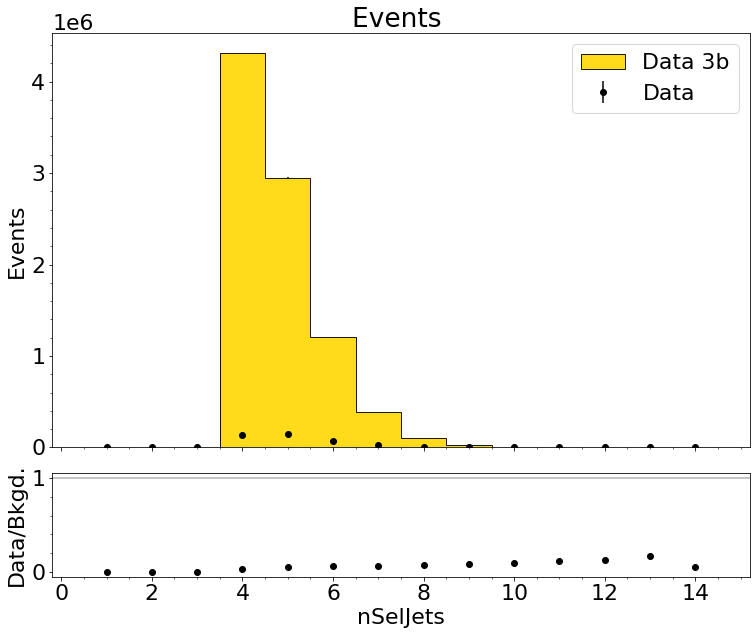

ValueError: weights should have the same shape as x

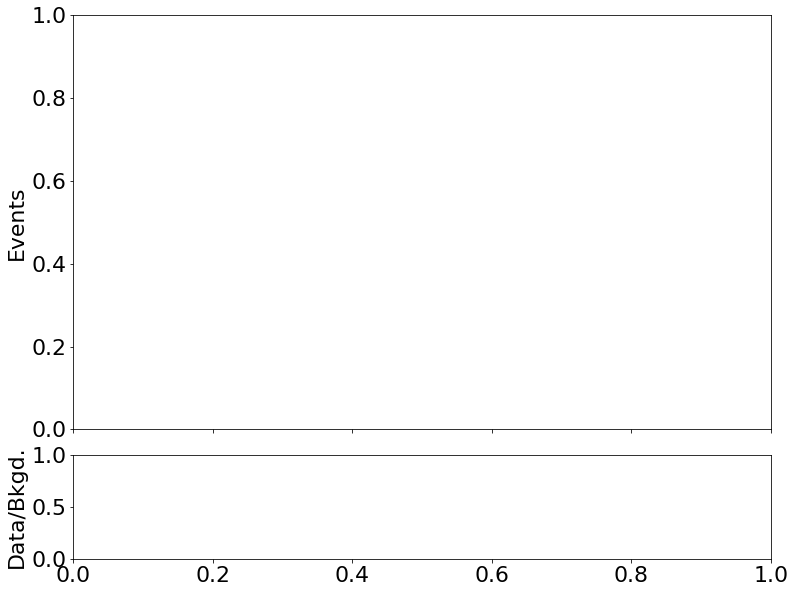

In [10]:
prefix = ''
for v, var in enumerate(varArr):
    rawPlot,_ = makePlot(np.sum(data4b[:,v],axis=0), np.sum(data3bRaw[:,v],axis=0), var=var)
    plt.savefig(prefix+var+'_Unweighted.png')
    plt.show(); plt.close()
    JCMPlot,_ = makePlot(np.sum(data4b[:,v],axis=0), np.sum(data3b[:,v],axis=0)-np.sum(ttbar3b[:,v],axis=0), ttbar4b = np.sum(ttbar4b[:,v],axis=0), title = 'wJCM', var=var)
    plt.savefig(prefix+var+'_wJCM.png')
    plt.show(); plt.close()
    wDtoMPlot,_ = makePlot(np.sum(data4b[:,v],axis=0), np.sum(data3bwDtoM[:,v],axis=0), ttbar4b = np.sum(ttbar4b[:,v],axis=0), title = 'wJCM wDtoM',var=var)
    plt.savefig(prefix+var+'_wJCMwDtoM.png')
    plt.show(); plt.close()
    w3to4Plot,_ = makePlot(np.sum(data4b[:,v],axis=0), np.sum(data3bw3to4[:,v],axis=0), ttbar4b = np.sum(ttbar4b[:,v],axis=0), title = 'wJCM wDtoM w3to4',var=var)
    plt.savefig(prefix+var+'_wJCMwDtoMw3to4.png')
    plt.show(); plt.close()


In [6]:

var = 'nSelJets'
wJCM = 'mcPseudoTagWeight'
data4b = np.array([getHistBincontent(getSelDataW(f), var=var) for f in dataMixFilename])

In [7]:
data4b = np.array([getHistBincontent(getSelDataW(f), var=var, inc=False) for f in dataMixFilename])

In [38]:
g = getSelDataW(data3bFilename[0], wDtoMFilename = wDtoMFilename[0])

In [15]:
var = 'nSelJets'
wJCM = 'mcPseudoTagWeight'





In [ ]:
### Types of plots: (for all years)
# 1) No weights whatsoever: make hist in 3b and 4b data w
# 1b) store for each year
# 2) JCM weights ->    4b data, 4b ttbar, subtract 3bttar from 3b data
# 3) wDtoM weights - > 4b data, 4b ttbar, 3b data wDtoM
# 4) w3to4 weights - > 4b data, 4b ttbar, 3b data w3to4

def getPlotWeights(data4bFile, data3bFile, data3bWeightFile, ttbar4bFile = None, wDtoMFilename = None, w3to4Filename = None, ttbar3bFile = None, ttbar3bWeightFile = None):    
    data4b, qcd3b, ttbar4b

In [ ]:
### open files, apply cuts

In [13]:
### skillet
mySr = (8-2)/2
heSr = (12-2.5)/2

mA = np.round(np.pi*mySr**2, 3)
hA = np.round(np.pi*heSr**2, 3)

print(mA, hA, np.round(hA - mA,3))

myC = 2.5*0.25
heC = np.round(myC * hA / mA,3)
print(myC, heC, np.round(heC/myC,3))

28.274 70.882 42.608
0.625 1.567 2.507


In [18]:
a = None; a =5
if a:
    print(a)

5


In [13]:
a = {}
# a[0] = 4

In [10]:
b={}

In [14]:
a['0'] = 4
b['0'] = 5

In [15]:
a

{'0': 4}

In [19]:
a = np.array(a)
b = np.array(b)

In [ ]:
# np.sum(np.sum(data4b, axis=0), axis=0)

In [33]:
k = data4b

In [ ]:
import numpy as np
import json as json

a = np.array([[1, 2], [3, 4], [5, 6]])

jsn = json.dumps(a.tolist())
with open("sample.json", "w") as outfile:
    outfile.write(jsn)

In [20]:
# for v in range(3):
a = {}
datName = ['data3bRaw', 'ttbar3bRaw', 'data4b', 'data3b', 'ttbar3b', 'ttbar4b', 'data3bwDtoM', 'data3bw3to4']
datArr = [data3bRaw, ttbar3bRaw, data4b, data3b, ttbar3b, ttbar4b, data3bwDtoM, data3bw3to4]

for d, dat in enumerate(datName):
    a[dat] = {}
    for i, y in enumerate(['2016', '2017', '2018']):
        a[dat][y] = {}     
        for v, var in enumerate(['nSelJets', 'm4j', 'leadStM', 'sublStM']):
            a[dat][y][var] = {}
            for SR in range(10):
                a[dat][y][var][SR] = (datArr[d][i][v][SR]).tolist()
            bins = getBinByVar(var)
            a[dat][y][var]['binL'] = (bins[:-1]).tolist()
            a[dat][y][var]['binU'] = (bins[1:]).tolist()
            a[dat][y][var]['binC'] = (0.5*(bins[:-1] + bins[1:])).tolist()
                
jsn = json.dumps(a)
with open("sample.json", "w") as outfile:
    outfile.write(jsn)

In [9]:
g = getBinByVar('m4j')

In [10]:
g

array([   0,   25,   50,   75,  100,  125,  150,  175,  200,  225,  250,
        275,  300,  325,  350,  375,  400,  425,  450,  475,  500,  525,
        550,  575,  600,  625,  650,  675,  700,  725,  750,  775,  800,
        825,  850,  875,  900,  925,  950,  975, 1000, 1025, 1050, 1075,
       1100, 1125, 1150, 1175, 1200, 1225, 1250, 1275, 1300, 1325, 1350,
       1375, 1400, 1425, 1450, 1475, 1500, 1525, 1550, 1575, 1600, 1625,
       1650, 1675, 1700, 1725, 1750, 1775])

In [17]:
0.5*(g[1:] + g[:-1])

array([  12.5,   37.5,   62.5,   87.5,  112.5,  137.5,  162.5,  187.5,
        212.5,  237.5,  262.5,  287.5,  312.5,  337.5,  362.5,  387.5,
        412.5,  437.5,  462.5,  487.5,  512.5,  537.5,  562.5,  587.5,
        612.5,  637.5,  662.5,  687.5,  712.5,  737.5,  762.5,  787.5,
        812.5,  837.5,  862.5,  887.5,  912.5,  937.5,  962.5,  987.5,
       1012.5, 1037.5, 1062.5, 1087.5, 1112.5, 1137.5, 1162.5, 1187.5,
       1212.5, 1237.5, 1262.5, 1287.5, 1312.5, 1337.5, 1362.5, 1387.5,
       1412.5, 1437.5, 1462.5, 1487.5, 1512.5, 1537.5, 1562.5, 1587.5,
       1612.5, 1637.5, 1662.5, 1687.5, 1712.5, 1737.5, 1762.5])

In [ ]:
0.5*(bins[:-1] + bins[1:])

In [57]:
def getBinByVar(var, m4jMax = 1800, dijetLim = 1000):
    if var == 'm4j':          
        bins = np.arange(0,m4jMax,25)
    if var == 'nSelJets':
        bins = np.arange(0.5,15.5,1)
    if var == 'leadStM' or var == 'sublStM':
        bins = np.arange(0,dijetLim, 25)
    return bins

In [ ]:
varArr = ['nSelJets', 'm4j', 'leadStM', 'sublStM']
wJCM = 'mcPseudoTagWeight'#Inclusive'
inc = False
data3bRaw = np.array([getHistBincontent(getSelDataW(f), var=varArr, wJCM='weight', inc=inc) for f in data3bFilename])
ttbar3bRaw = np.array([np.sum([getHistBincontent(getSelDataW(t), var=varArr, wJCM='weight', inc=inc) for t in ttType], axis=0) for ttType in ttFilename3b])
data4b = np.array([getHistBincontent(getSelDataW(f), var=varArr, inc=inc) for f in dataMixFilename])
data3b = np.array([getHistBincontent(getSelDataW(f), var=varArr, wJCM=wJCM, inc=inc) for f in data3bFilename])
ttbar3b = np.array([np.sum([getHistBincontent(getSelDataW(t), var=varArr, wJCM=wJCM, inc=inc) for t in ttType], axis=0) for ttType in ttFilename3b])
ttbar4b = np.array([np.sum([getHistBincontent(getSelDataW(t), var=varArr, inc=inc) for t in ttType], axis=0) for ttType in ttFilename])
data3bwDtoM = np.array([getHistBincontent(*getSelDataW(data3bFilename[i], wDtoMFilename = wDtoMFilename[i]), var=varArr, wJCM=wJCM , inc=inc) for i in range(len(yearArr))])
data3bw3to4 = np.array([getHistBincontent(*getSelDataW(data3bFilename[i], wDtoMFilename = wDtoMFilename[i], w3to4Filename = w3to4Filename[i]), var=varArr, wJCM=wJCM, inc=inc) for i in range(len(yearArr))])
